# **Train**

**Columns:**
1.   id - customer's unique ID (ID unik untuk setiap nasabah)
2.   age - customer's age (Usia nasabah)
3.   job - customer's current job (Pekerjaan nasabah)
4.   marital - customer's marital status (Status pernikahan nasabah)
5.   education- customer's education level (Tingkat pendidikan nasabah)
6.   default- has credit in default? (Apakah nasabah memiliki kredit macet?)
7.   balance- average yearly balance (Rata-rata saldo tahunan di rekening nasabah)
8.   housing- has housing loan? (Apakah nasabah memiliki pinjaman perumahan?)
9.   loan- has personal loan? (Apakah nasabah memiliki pinjaman pribadi?)
10.   contact- contact type (Jenis kontak komunikasi yang digunakan)
11.   day_of_week- last contact day of the week (Hari dalam minggu saat kontak terakhir dilakukan)
12.   month - last contact month of the year (Bulan saat kontak terakhir dilakukan)
13.   duration - last contact duration in second (Durasi kontak terakhir dalam detik)
14.   campaign - number of contacts performed during this campaign for this client (Jumlah kontak yang dilakukan selama kampanye ini untuk nasabah tersebut)
15.   pdays - number of days passed after last contact from previous campaign; -1 means client was not previously contacted (Jumlah hari sejak nasabah terakhir dihubungi pada kampanye sebelumnya. Nilai -1 berarti nasabah belum pernah dihubungi sebelumnya)
16.   previous - number of contacts performed before this campaign for this client (Jumlah total kontak sebelum kampanye ini untuk nasabah tersebut)
17.   poutcome - outcome of the previous marketing campaign (Hasil dari kampanye pemasaran sebelumnya)
18.   y - target variable, has the client subscribed a term deposit? (Apakah nasabah berlangganan deposito berjangka?)

In [ ]:
import gdown
import os
import zipfile

url = 'https://drive.google.com/uc?id=15EMJFNxWrkBfgUIaV7oiLk73TL2PSaJY'
output = 'adiip-2025-programming-test-type-a-ml-predict.zip'
gdown.download(url, output)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

os.remove(output)

Downloading...
From: https://drive.google.com/uc?id=15EMJFNxWrkBfgUIaV7oiLk73TL2PSaJY
To: /content/adiip-2025-programming-test-type-a-ml-predict.zip
100%|██████████| 588k/588k [00:00<00:00, 87.7MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('bank-train.csv', delimiter=';')
df.tail()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39995,40095,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,-1,0,unknown,0
39996,40096,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,-1,0,unknown,1
39997,40097,54,admin.,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,-1,0,unknown,1
39998,40098,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,90,7,other,0
39999,40099,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,119,1,failure,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40000 non-null  int64 
 1   age        40000 non-null  int64 
 2   job        40000 non-null  object
 3   marital    40000 non-null  object
 4   education  40000 non-null  object
 5   default    40000 non-null  object
 6   balance    40000 non-null  int64 
 7   housing    40000 non-null  object
 8   loan       40000 non-null  object
 9   contact    40000 non-null  object
 10  day        40000 non-null  int64 
 11  month      40000 non-null  object
 12  duration   40000 non-null  int64 
 13  campaign   40000 non-null  int64 
 14  pdays      40000 non-null  int64 
 15  previous   40000 non-null  int64 
 16  poutcome   40000 non-null  object
 17  y          40000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 5.5+ MB


In [ ]:
cat_cols = df.select_dtypes(include=['object'])

for col in cat_cols:
  print(df[col].value_counts())
  print()

job
blue-collar      9383
management       8166
technician       6852
admin.           4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64

marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64

education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: count, dtype: int64

default
no     39191
yes      809
Name: count, dtype: int64

housing
yes    24031
no     15969
Name: count, dtype: int64

loan
no     33070
yes     6930
Name: count, dtype: int64

contact
cellular     24914
unknown      12765
telephone     2321
Name: count, dtype: int64

month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: count, dtype: int64

poutcome
unknown    34607
failure     3730
other       

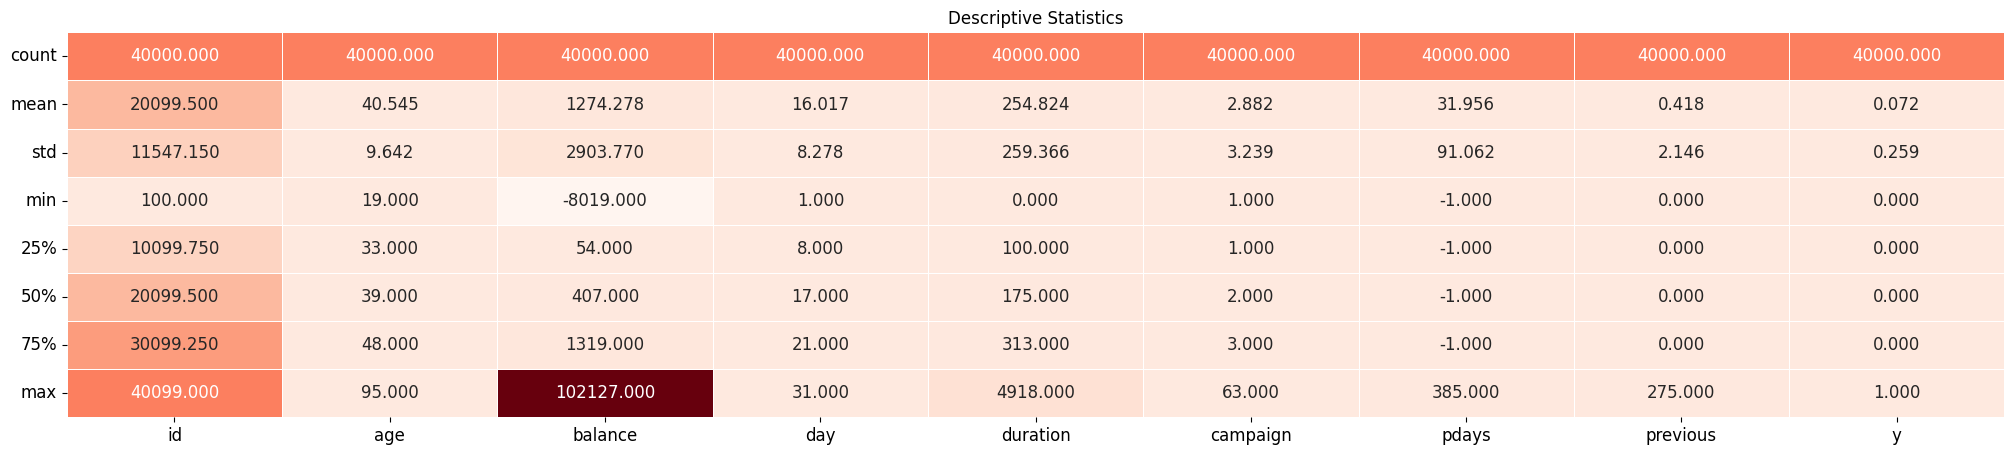

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64','float64'])

def desc_stats(num_cols):
  desc = df.describe()
  fig, ax = plt.subplots(figsize=(25, 5))
  sns.heatmap(
      desc, annot=True, cmap='Reds', fmt='.3f',
      ax=ax, linecolor='white', linewidths=0.5,
      cbar=False, annot_kws={"size": 12})
  plt.xticks(size=12)
  plt.yticks(size=12, rotation=0)
  plt.title("Descriptive Statistics", size=12)
  plt.show()

desc_stats(num_cols)

## **Data Preprocessing**

In [ ]:
print(df.isna().sum())

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
print('Number of duplicates: ', df.duplicated().sum())

Number of duplicates:  0


In [ ]:
unknown_percentages_in_columns = round(((df == 'unknown').mean() * 100), 3)
failure_percentages_in_columns = round(((df == 'failure').mean() * 100), 3)
other_percentages_in_columns = round(((df == 'other').mean() * 100), 3)
success_percentages_in_columns = round(((df == 'success').mean() * 100), 3)

print("Percentage of 'unknown' values in each column:")
print(unknown_percentages_in_columns)
print()
print("Percentage of 'failure' values in each column:")
print(failure_percentages_in_columns)
print()
print("Percentage of 'other' values in each column:")
print(other_percentages_in_columns)
print()
print("Percentage of 'success' values in each column:")
print(success_percentages_in_columns)

Percentage of 'unknown' values in each column:
id            0.000
age           0.000
job           0.588
marital       0.000
education     3.828
default       0.000
balance       0.000
housing       0.000
loan          0.000
contact      31.912
day           0.000
month         0.000
duration      0.000
campaign      0.000
pdays         0.000
previous      0.000
poutcome     86.518
y             0.000
dtype: float64

Percentage of 'failure' values in each column:
id           0.000
age          0.000
job          0.000
marital      0.000
education    0.000
default      0.000
balance      0.000
housing      0.000
loan         0.000
contact      0.000
day          0.000
month        0.000
duration     0.000
campaign     0.000
pdays        0.000
previous     0.000
poutcome     9.325
y            0.000
dtype: float64

Percentage of 'other' values in each column:
id           0.000
age          0.000
job          0.000
marital      0.000
education    0.000
default      0.000
balance      

In [ ]:
df.drop(columns=['poutcome'], inplace=True)
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,100,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,101,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0
2,102,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0
3,103,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
4,104,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0


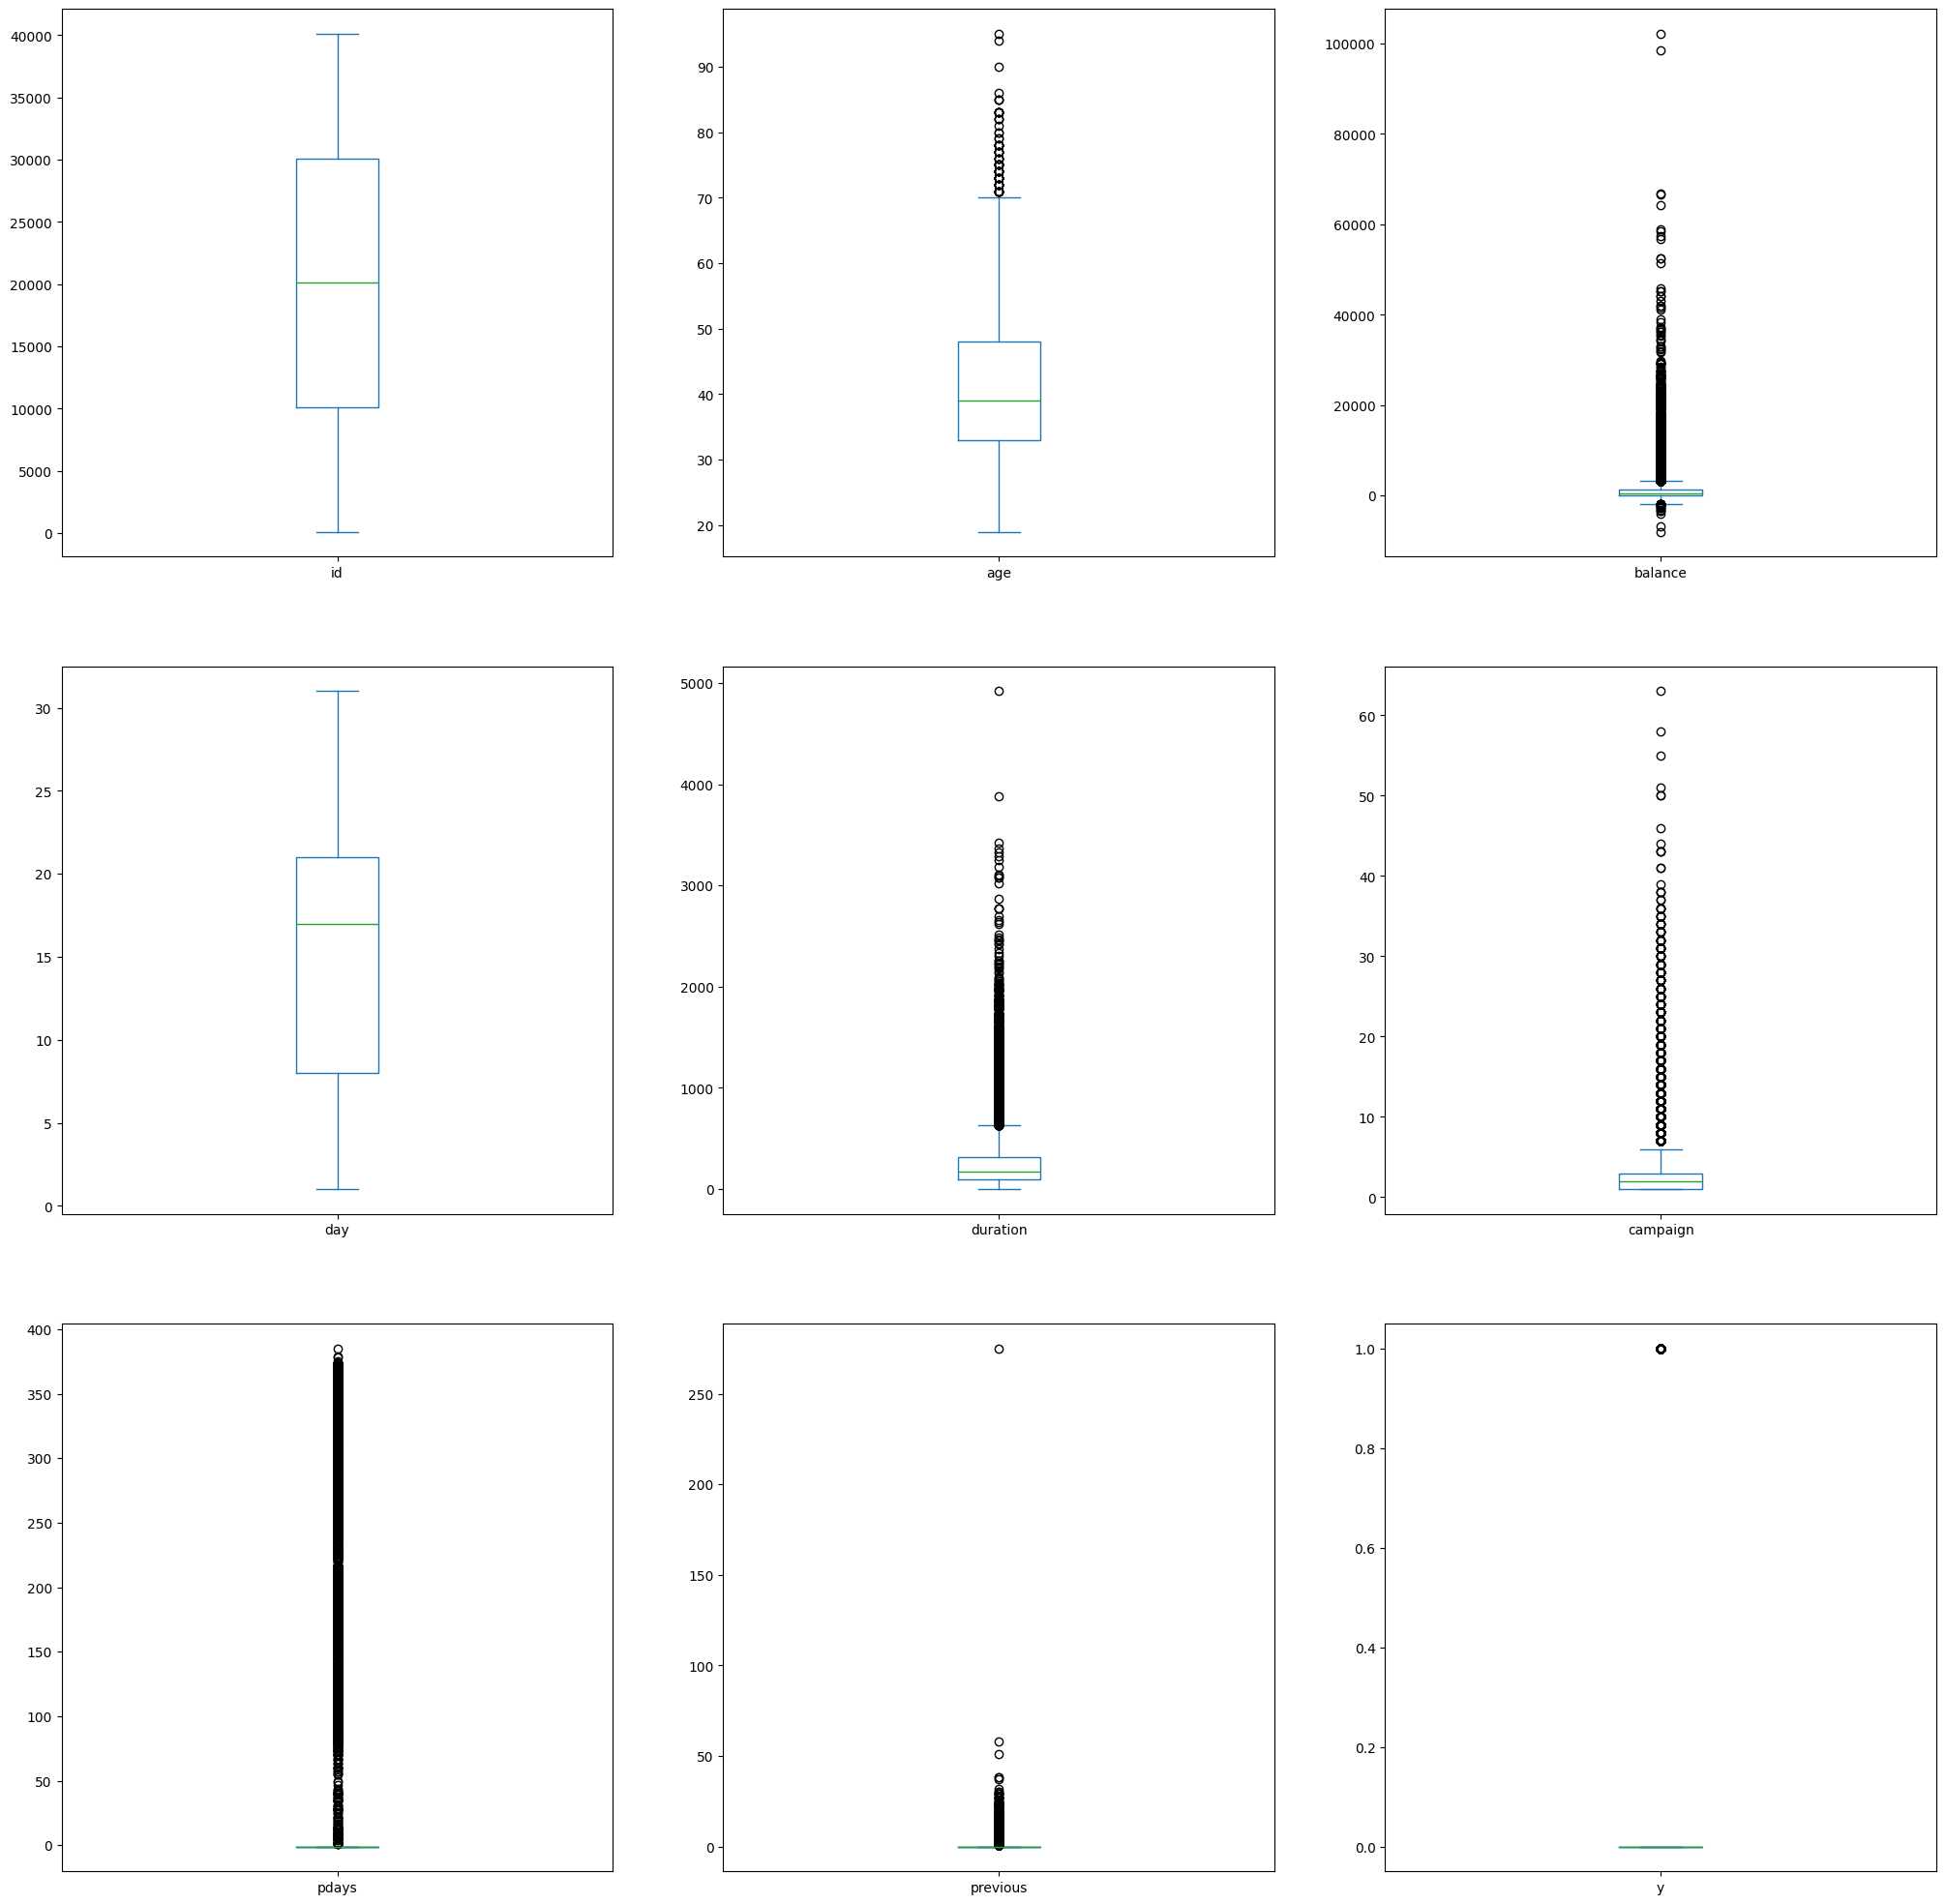

In [ ]:
df.plot(kind="box", subplots=True, figsize=(25, 25), layout=(3, 3))
plt.show()

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [ ]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]

df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

In [ ]:
Q1 = df['duration'].quantile(0.20)
Q3 = df['duration'].quantile(0.80)
# Q1 = df['duration'].quantile(0.25)
# Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

df = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

In [ ]:
Q1 = df['campaign'].quantile(0.10)
Q3 = df['campaign'].quantile(0.90)
# Q1 = df['campaign'].quantile(0.25)
# Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]

df = df[(df['campaign'] >= lower_bound) & (df['campaign'] <= upper_bound)]

In [ ]:
Q1 = df['previous'].quantile(0.05)
Q3 = df['previous'].quantile(0.95)
# Q1 = df['previous'].quantile(0.25)
# Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['previous'] < lower_bound) | (df['previous'] > upper_bound)]

df = df[(df['previous'] >= lower_bound) & (df['previous'] <= upper_bound)]

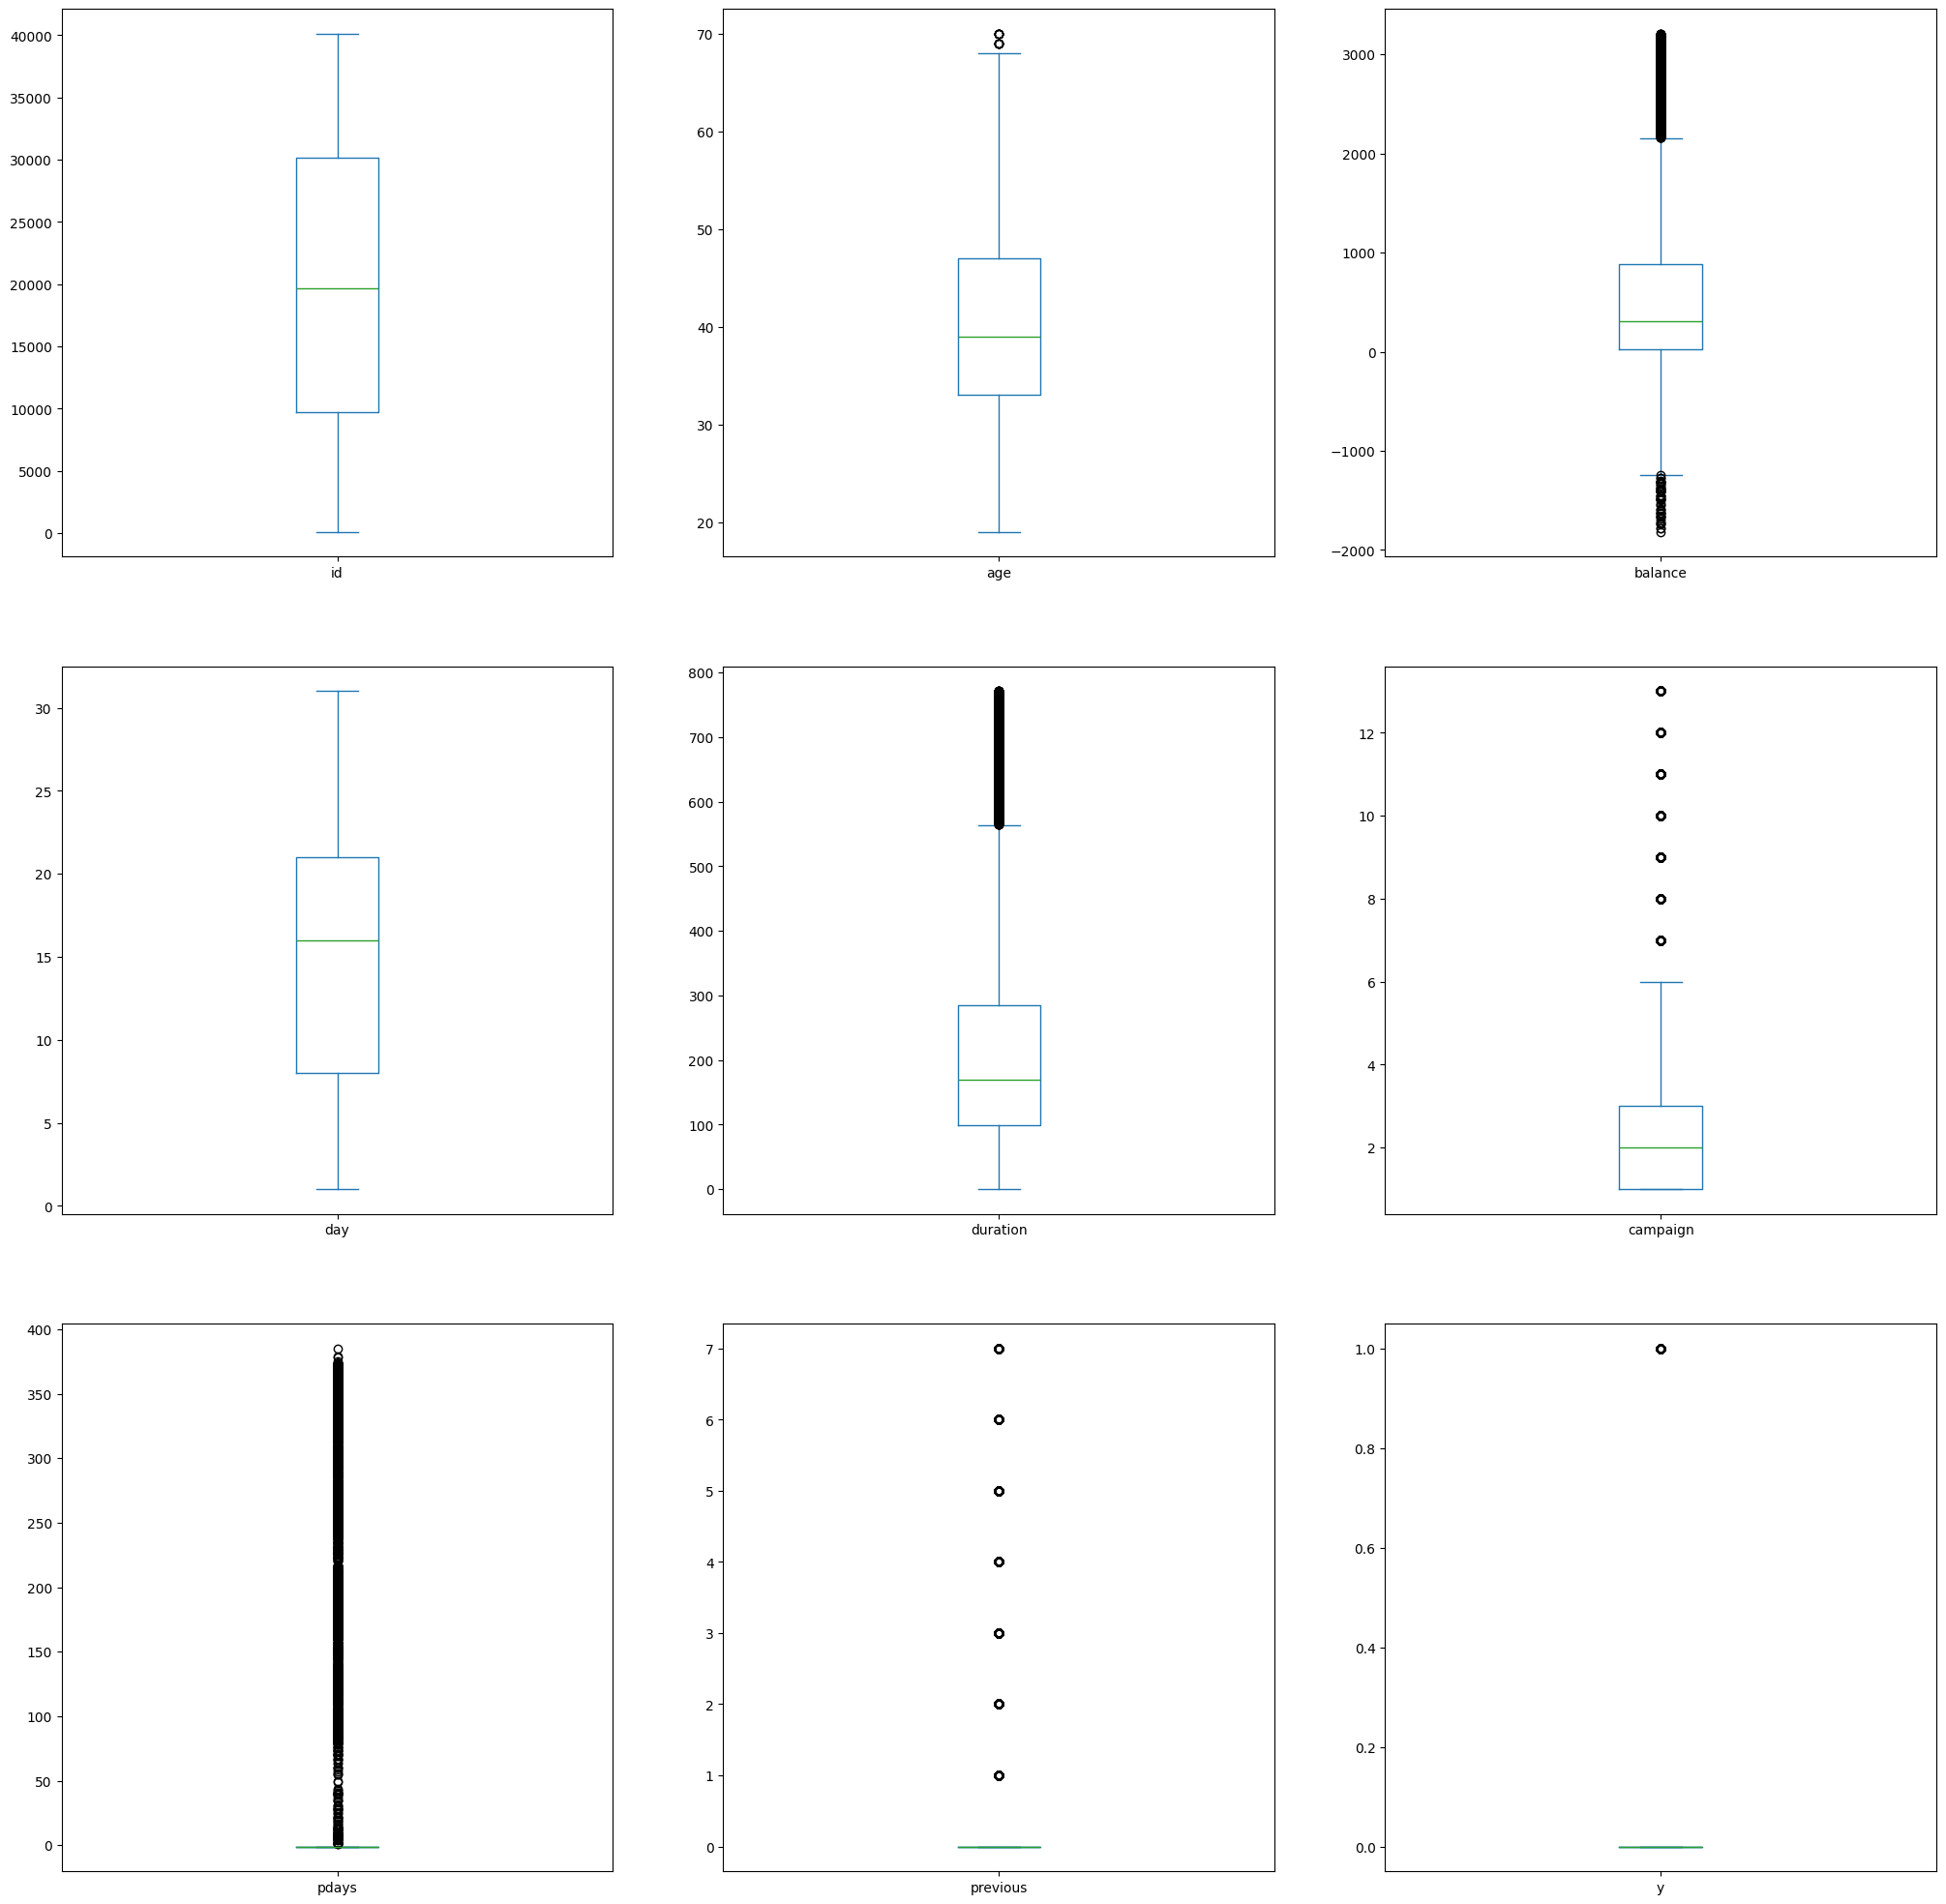

In [ ]:
df.plot(kind="box", subplots=True, figsize=(25, 25), layout=(3, 3))
plt.show()

## **Exploratory Data Analysis**

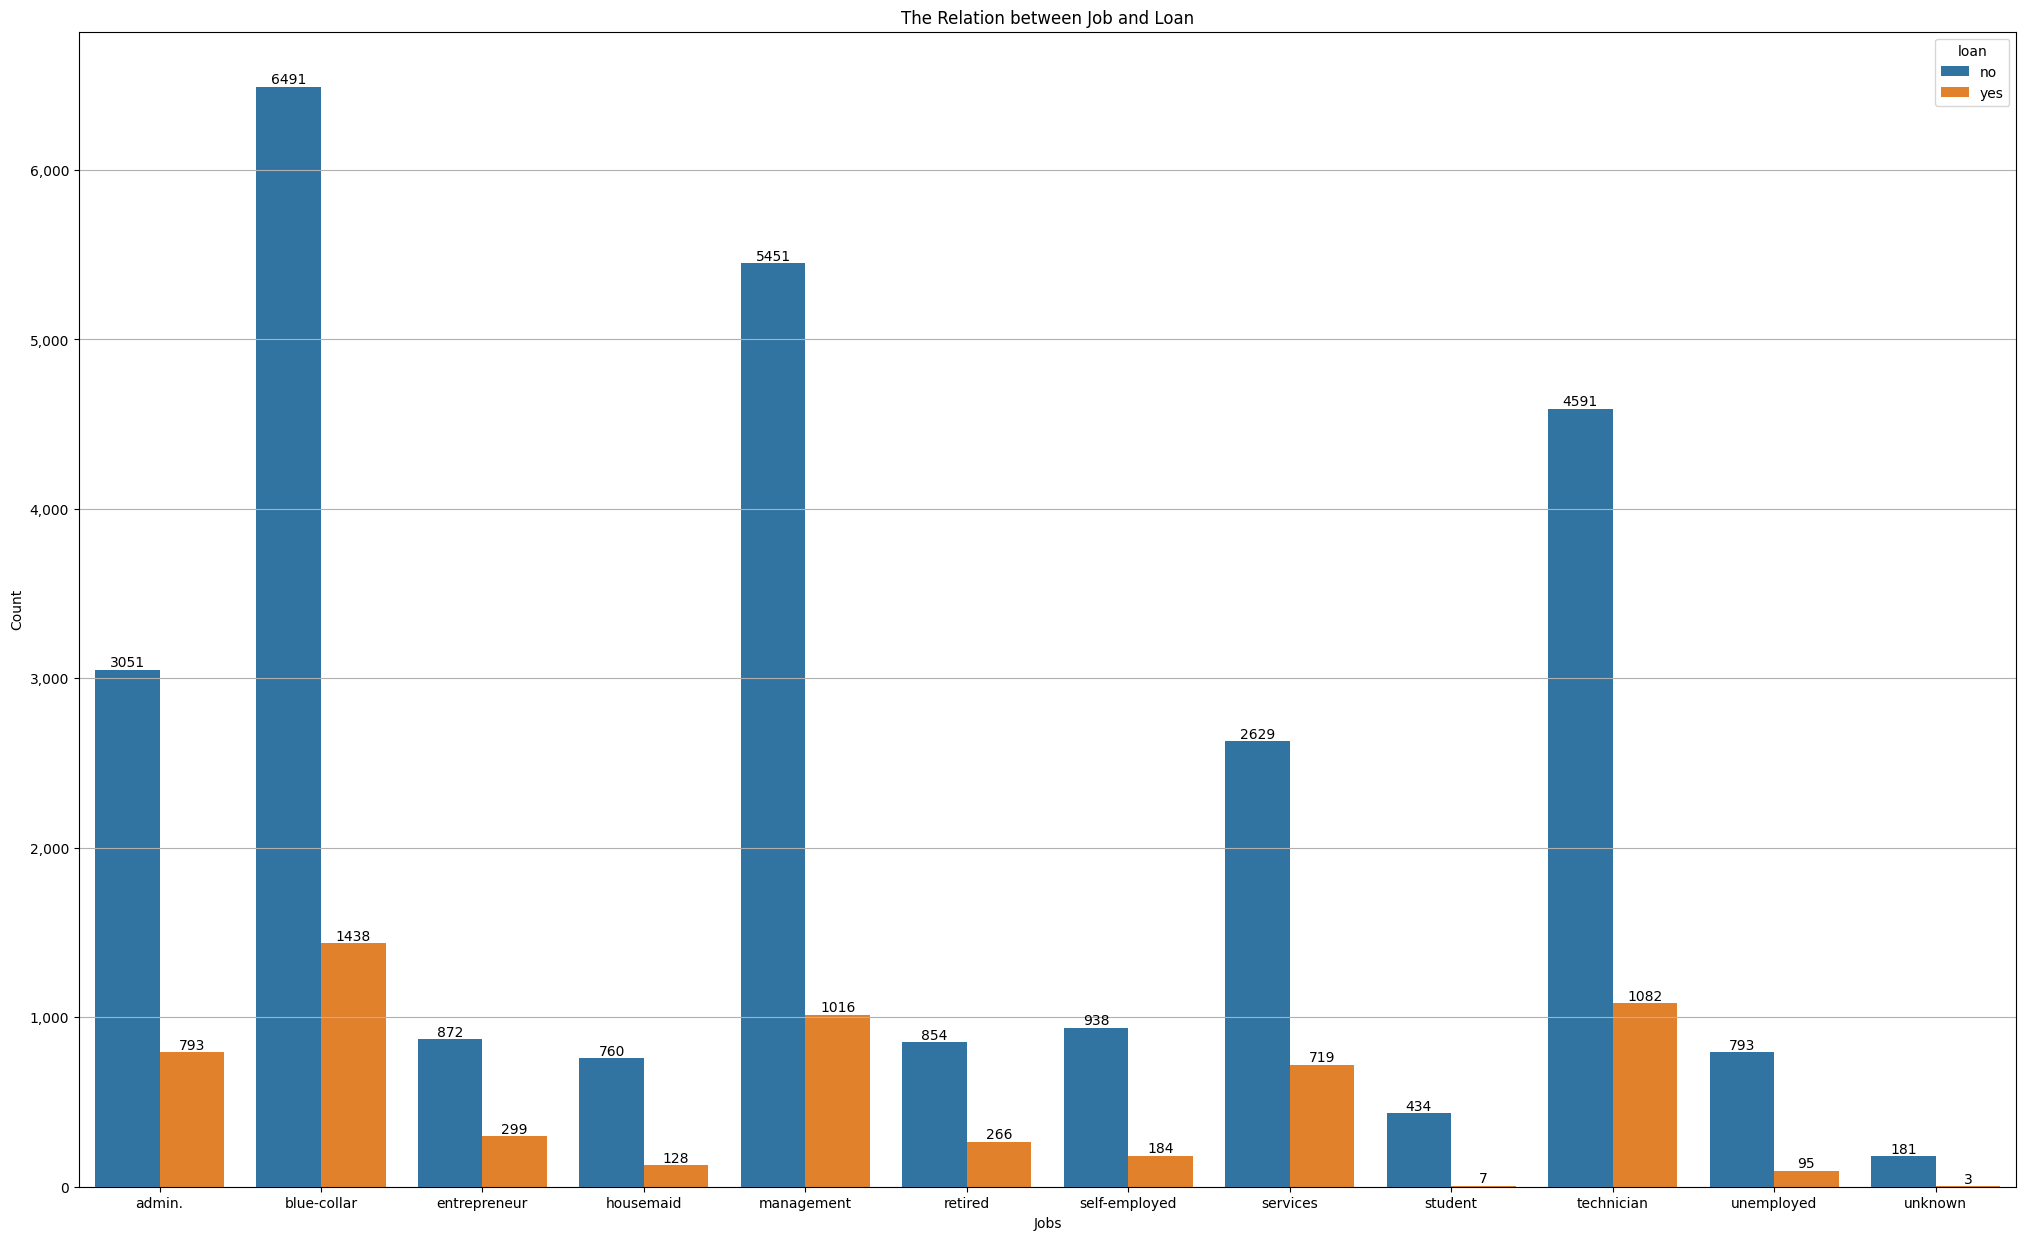

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

group_job_loan = df.groupby('job')['loan'].value_counts().reset_index()

sns.barplot(x='job', y='count', hue='loan', data=group_job_loan)

ax.set_title("The Relation between Job and Loan")
ax.set_xlabel("Jobs")
ax.set_ylabel("Count")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

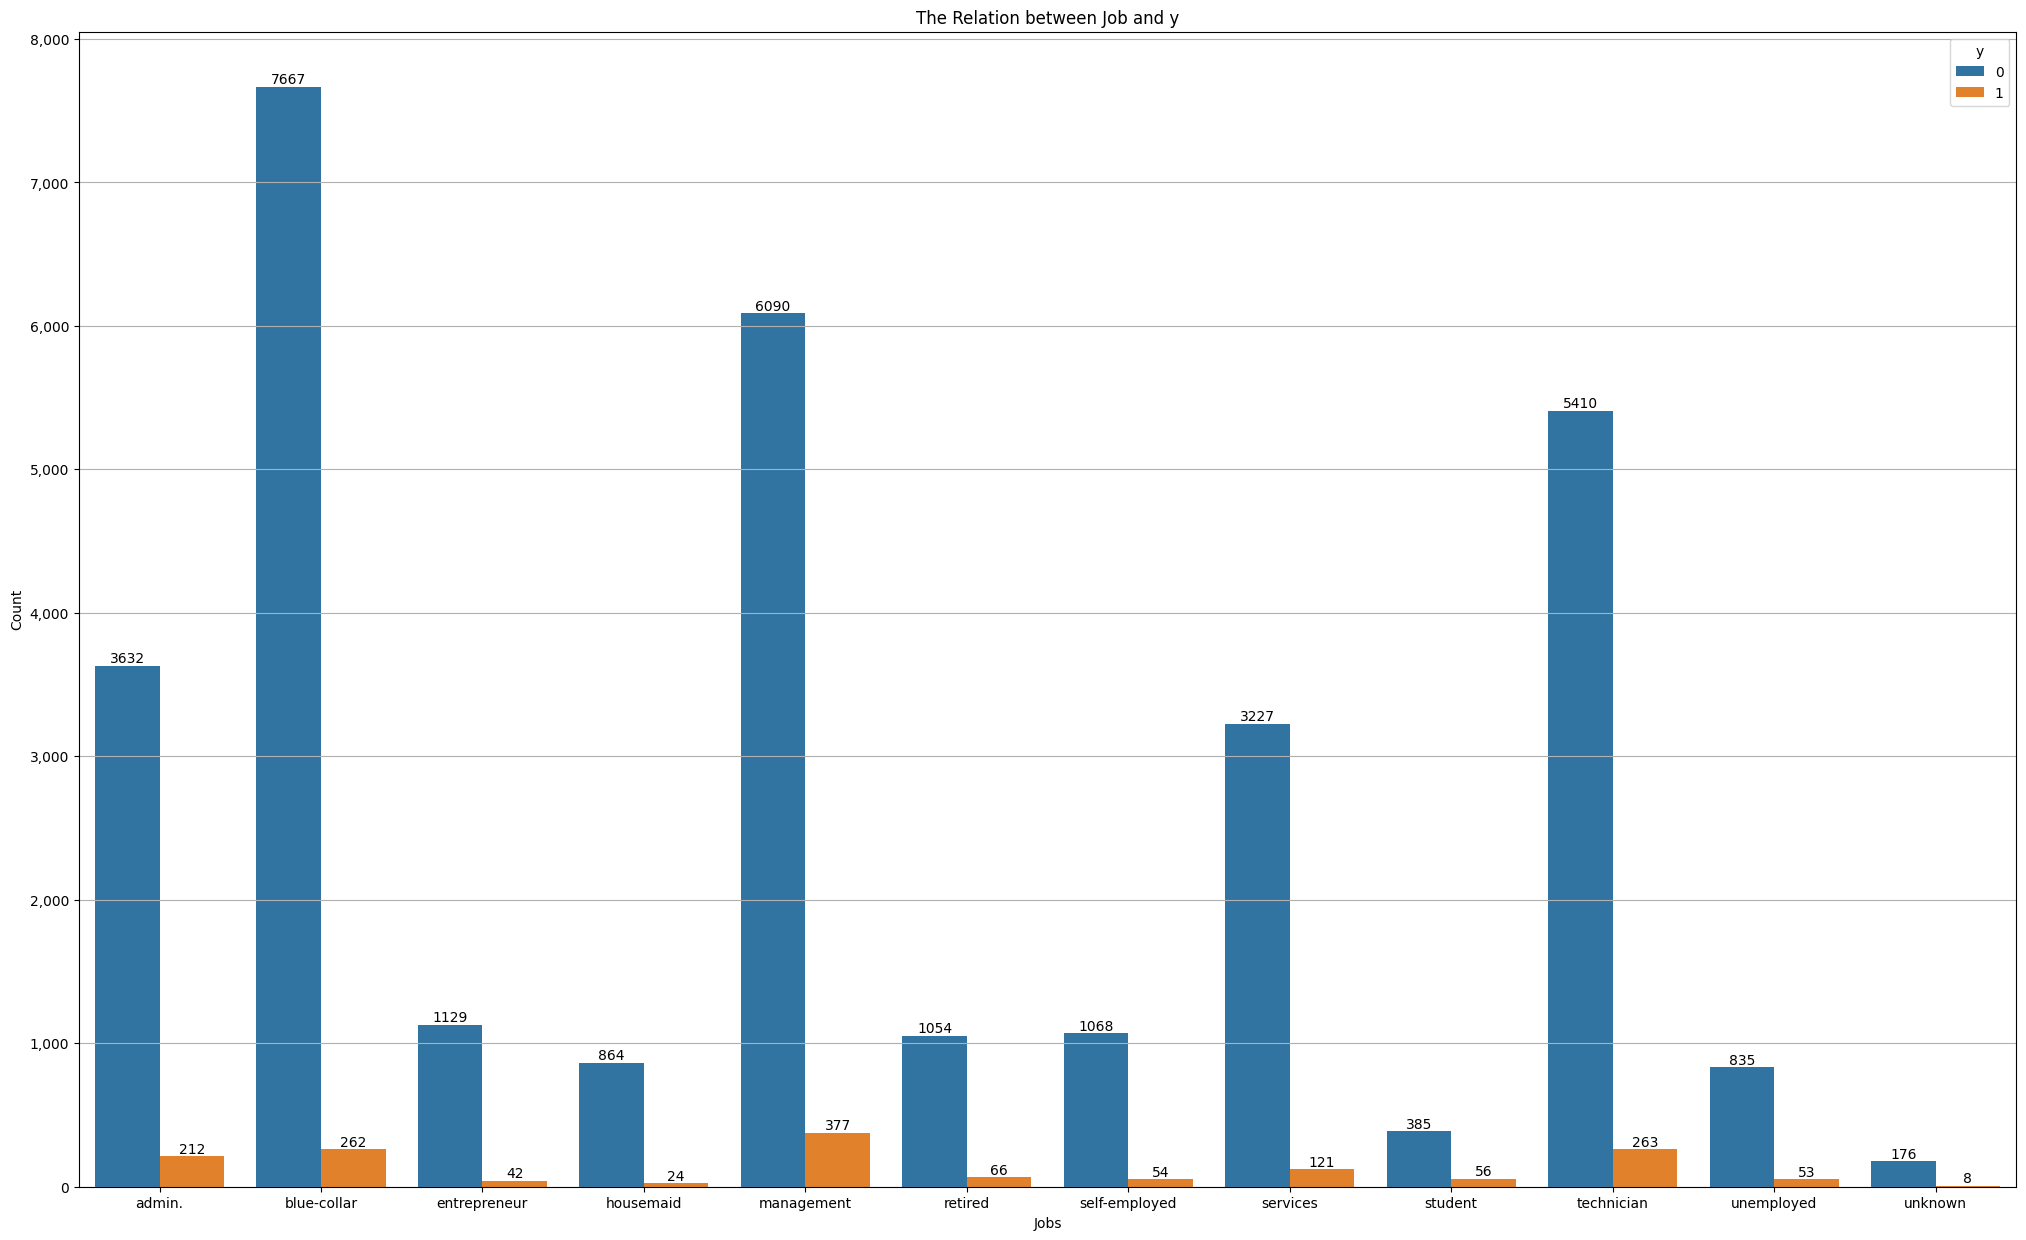

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

group_job_y = df.groupby('job')['y'].value_counts().reset_index()

sns.barplot(x='job', y='count', hue='y', data=group_job_y)

ax.set_title("The Relation between Job and y")
ax.set_xlabel("Jobs")
ax.set_ylabel("Count")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

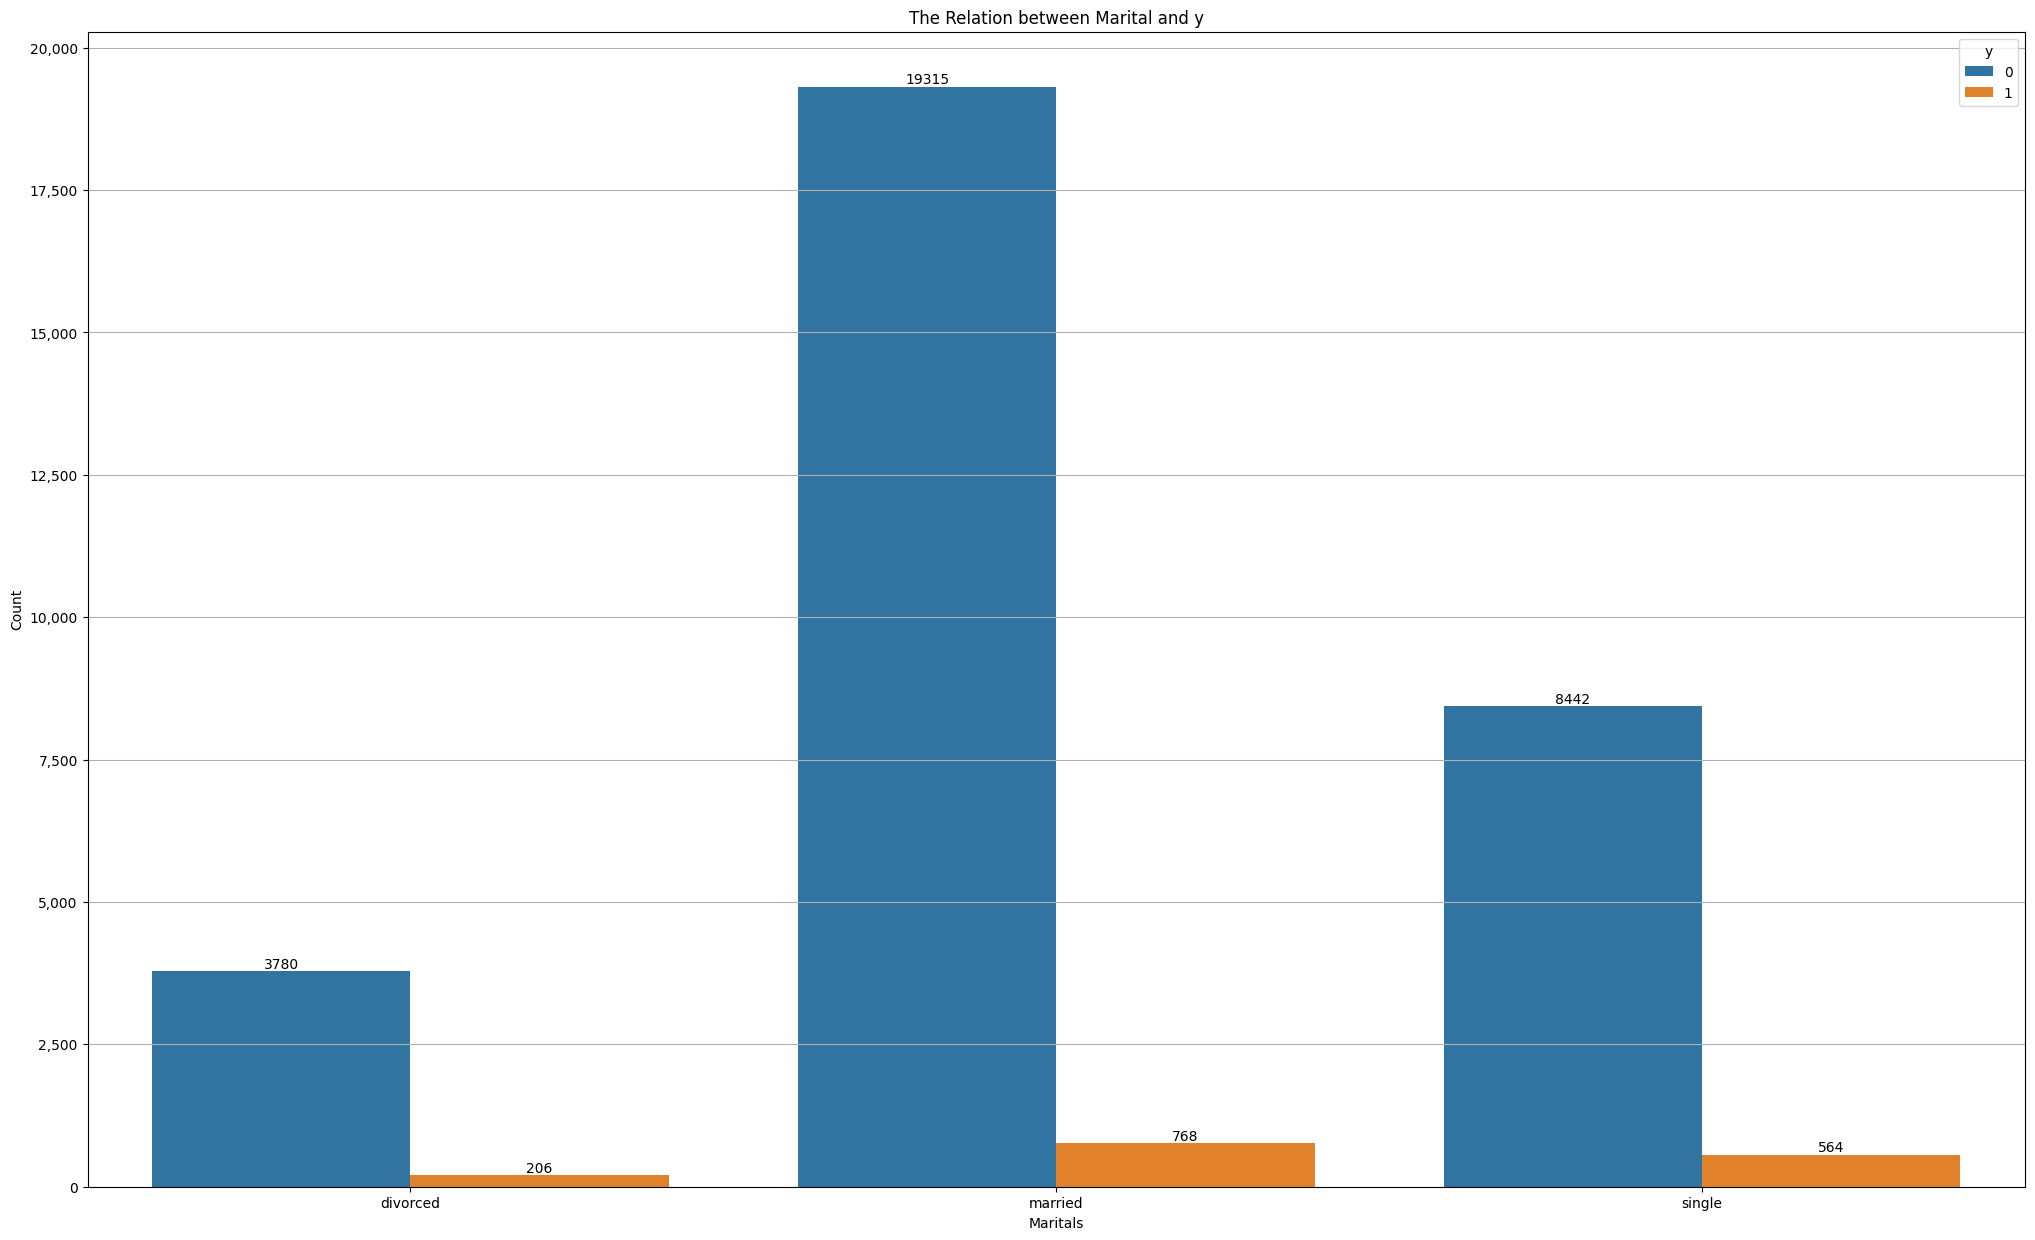

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

group_marital_y = df.groupby('marital')['y'].value_counts().reset_index()

sns.barplot(x='marital', y='count', hue='y', data=group_marital_y)

ax.set_title("The Relation between Marital and y")
ax.set_xlabel("Maritals")
ax.set_ylabel("Count")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

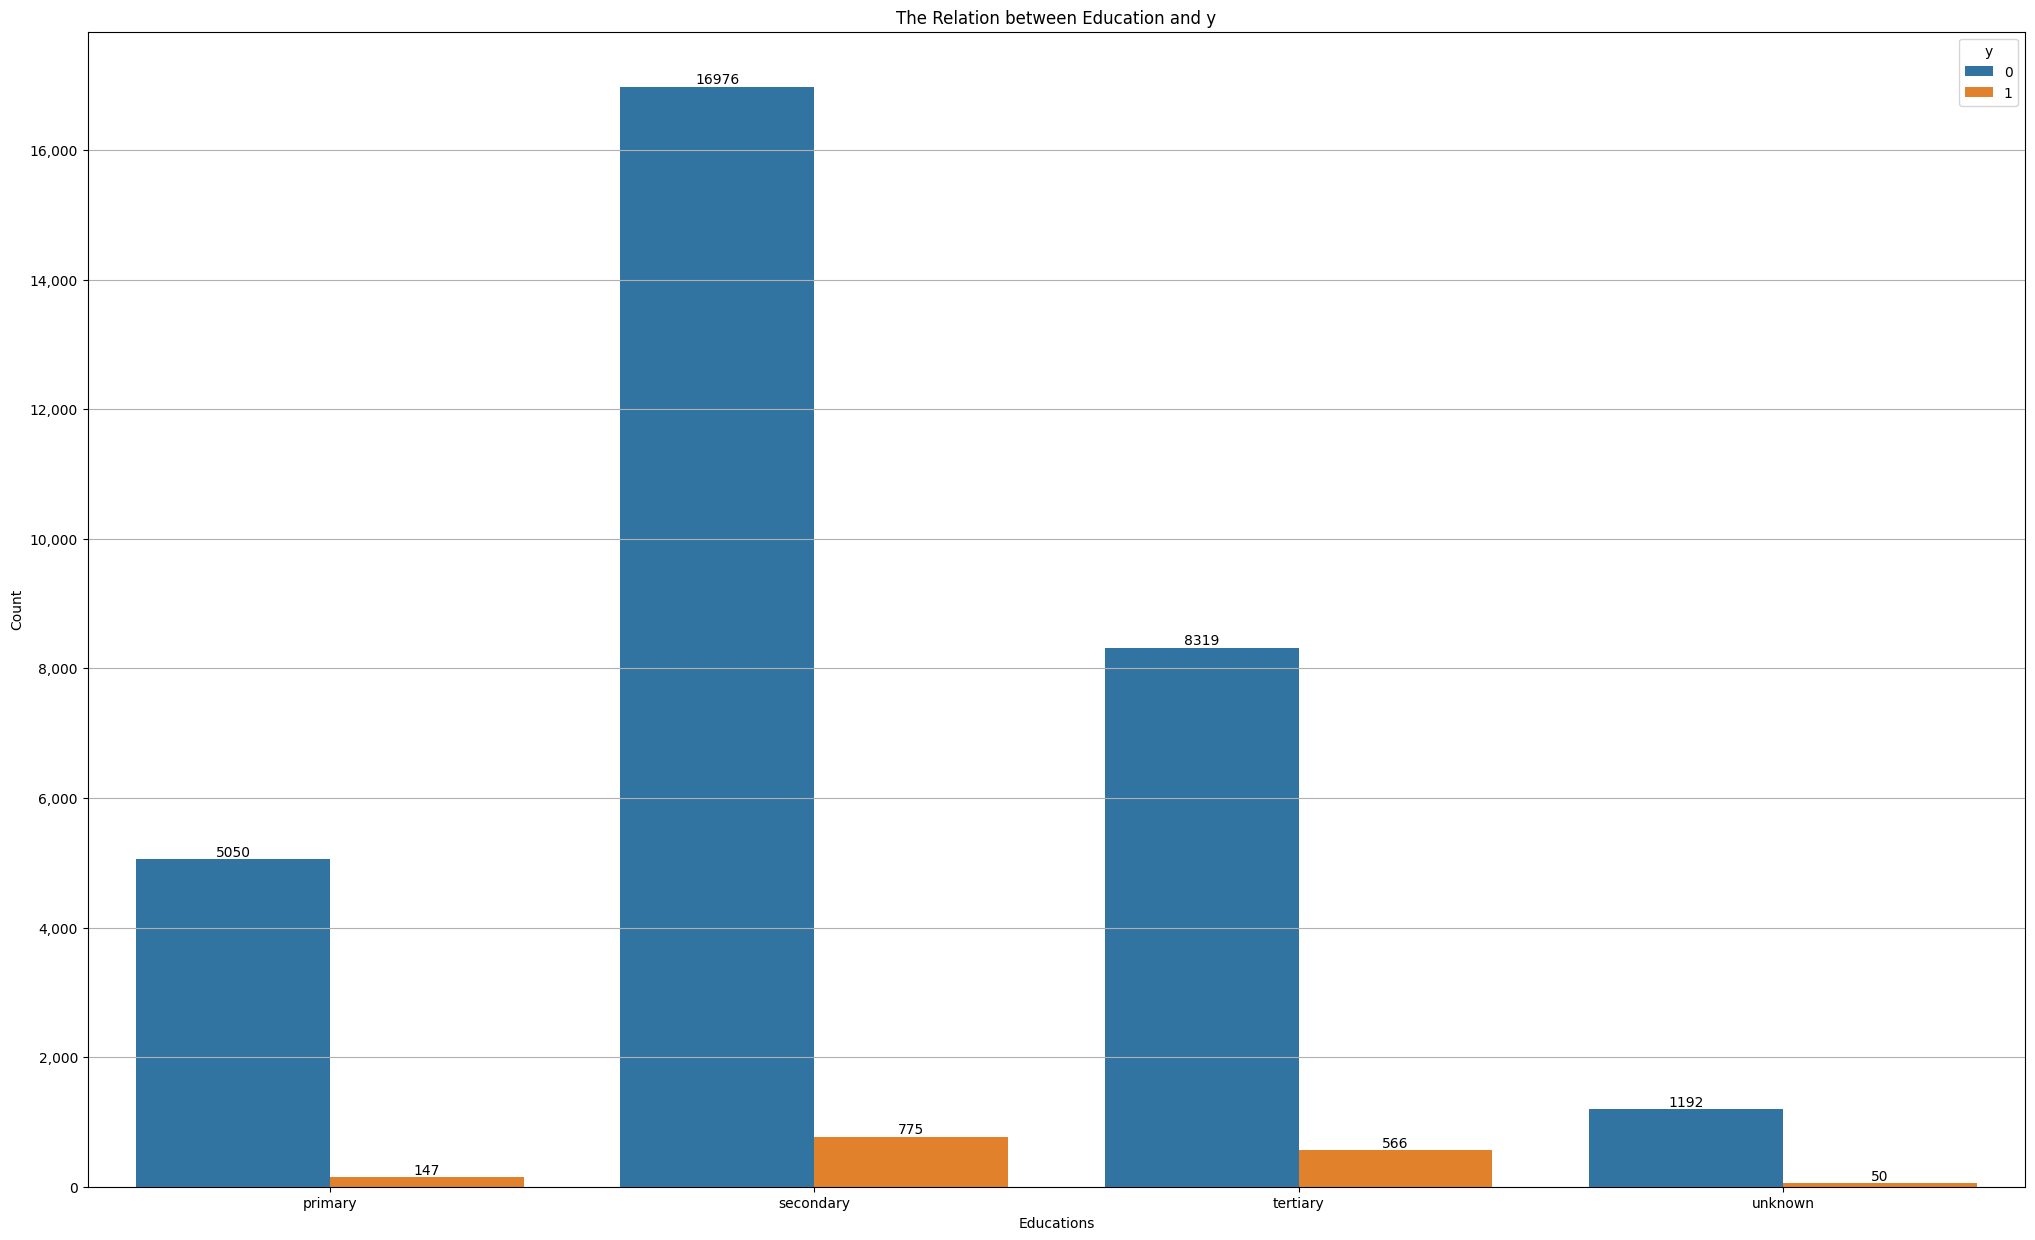

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

group_education_y = df.groupby('education')['y'].value_counts().reset_index()

sns.barplot(x='education', y='count', hue='y', data=group_education_y)

ax.set_title("The Relation between Education and y")
ax.set_xlabel("Educations")
ax.set_ylabel("Count")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

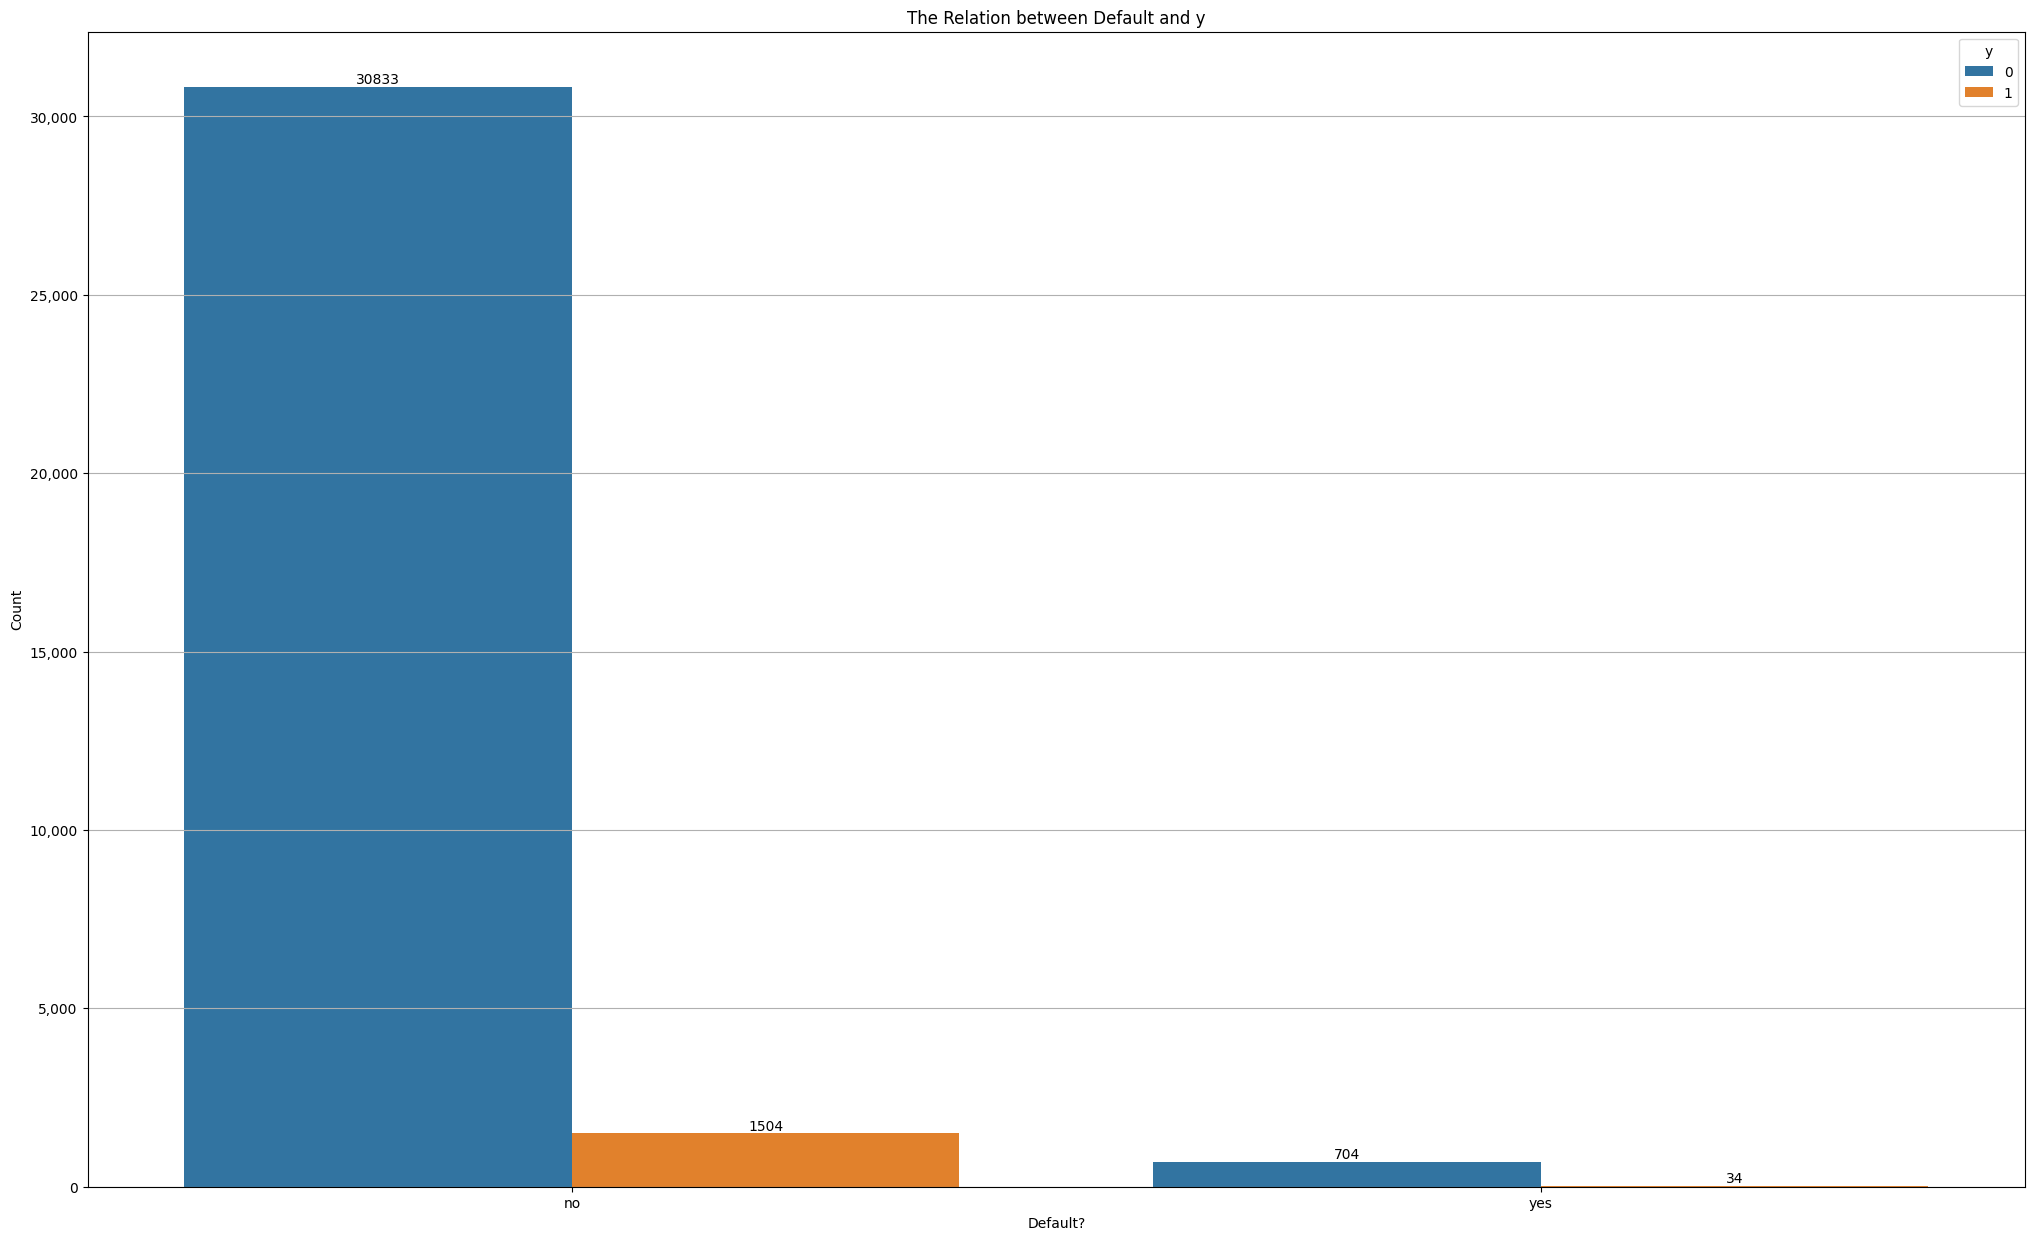

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

group_default_y = df.groupby('default')['y'].value_counts().reset_index()

sns.barplot(x='default', y='count', hue='y', data=group_default_y)

ax.set_title("The Relation between Default and y")
ax.set_xlabel("Default?")
ax.set_ylabel("Count")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

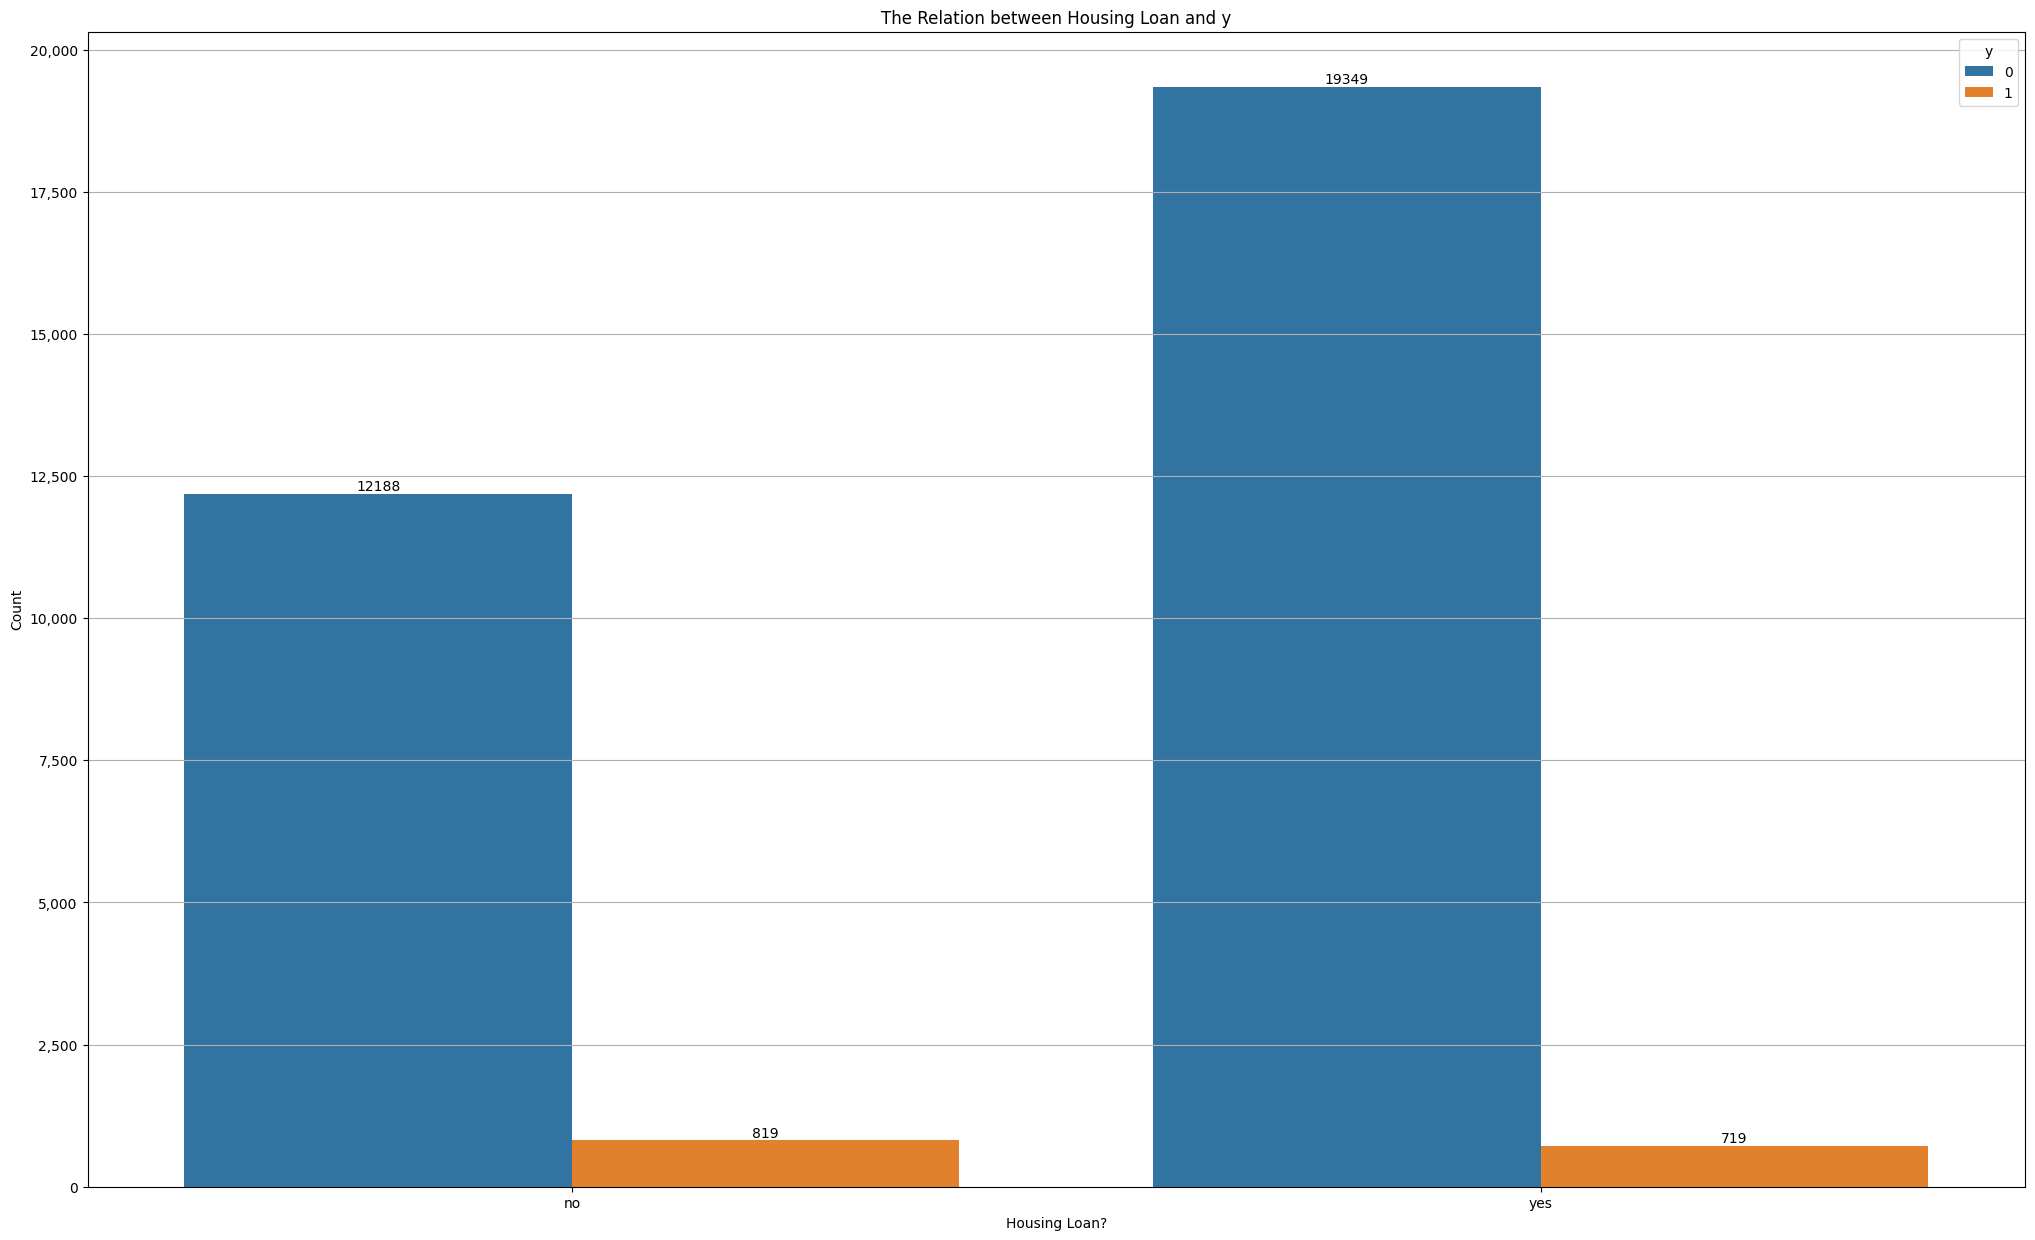

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

group_housing_y = df.groupby('housing')['y'].value_counts().reset_index()

sns.barplot(x='housing', y='count', hue='y', data=group_housing_y)

ax.set_title("The Relation between Housing Loan and y")
ax.set_xlabel("Housing Loan?")
ax.set_ylabel("Count")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

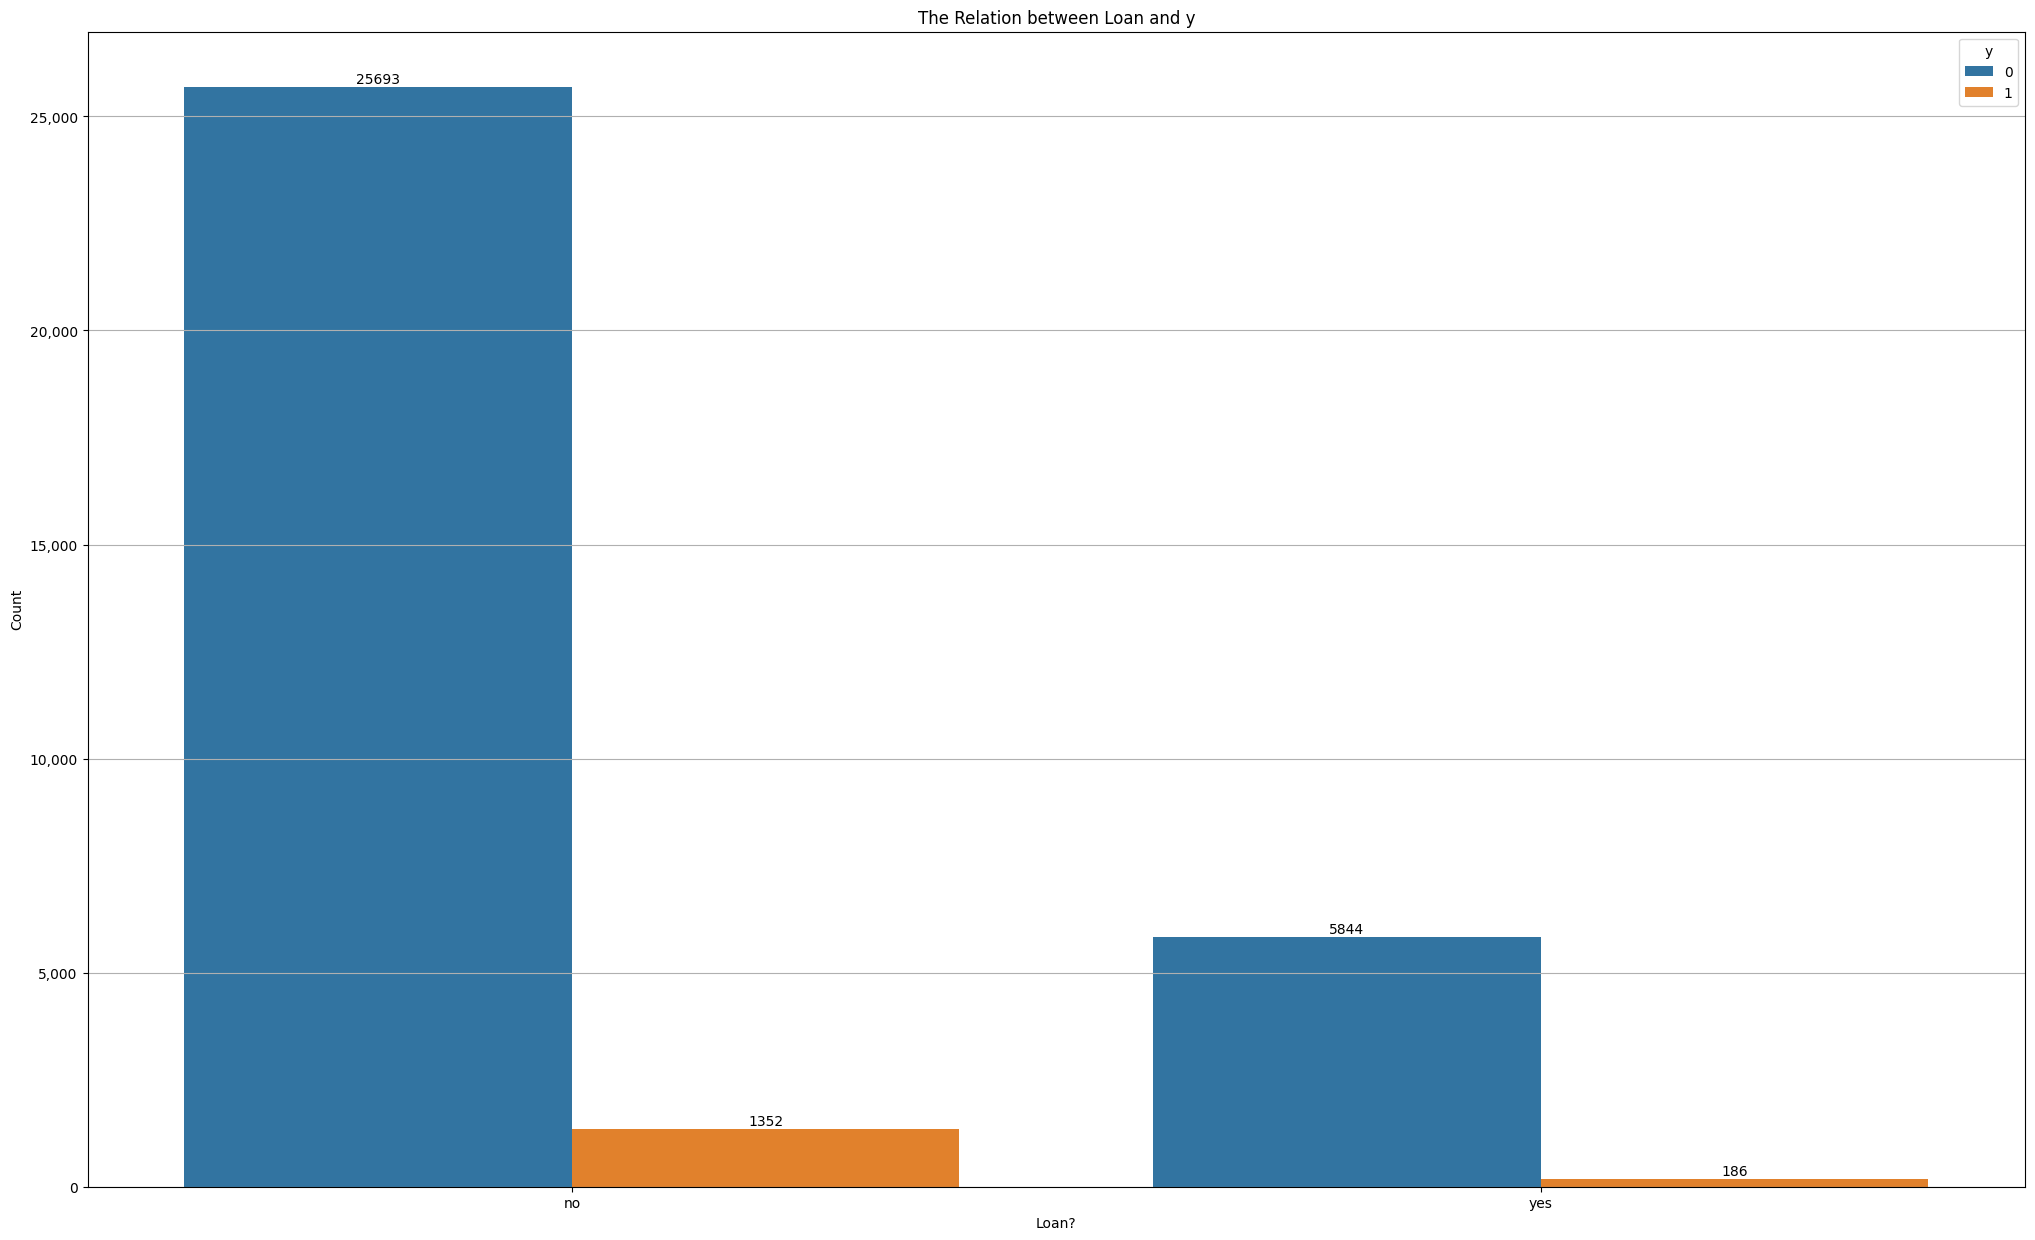

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

group_loan_y = df.groupby('loan')['y'].value_counts().reset_index()

sns.barplot(x='loan', y='count', hue='y', data=group_loan_y)

ax.set_title("The Relation between Loan and y")
ax.set_xlabel("Loan?")
ax.set_ylabel("Count")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

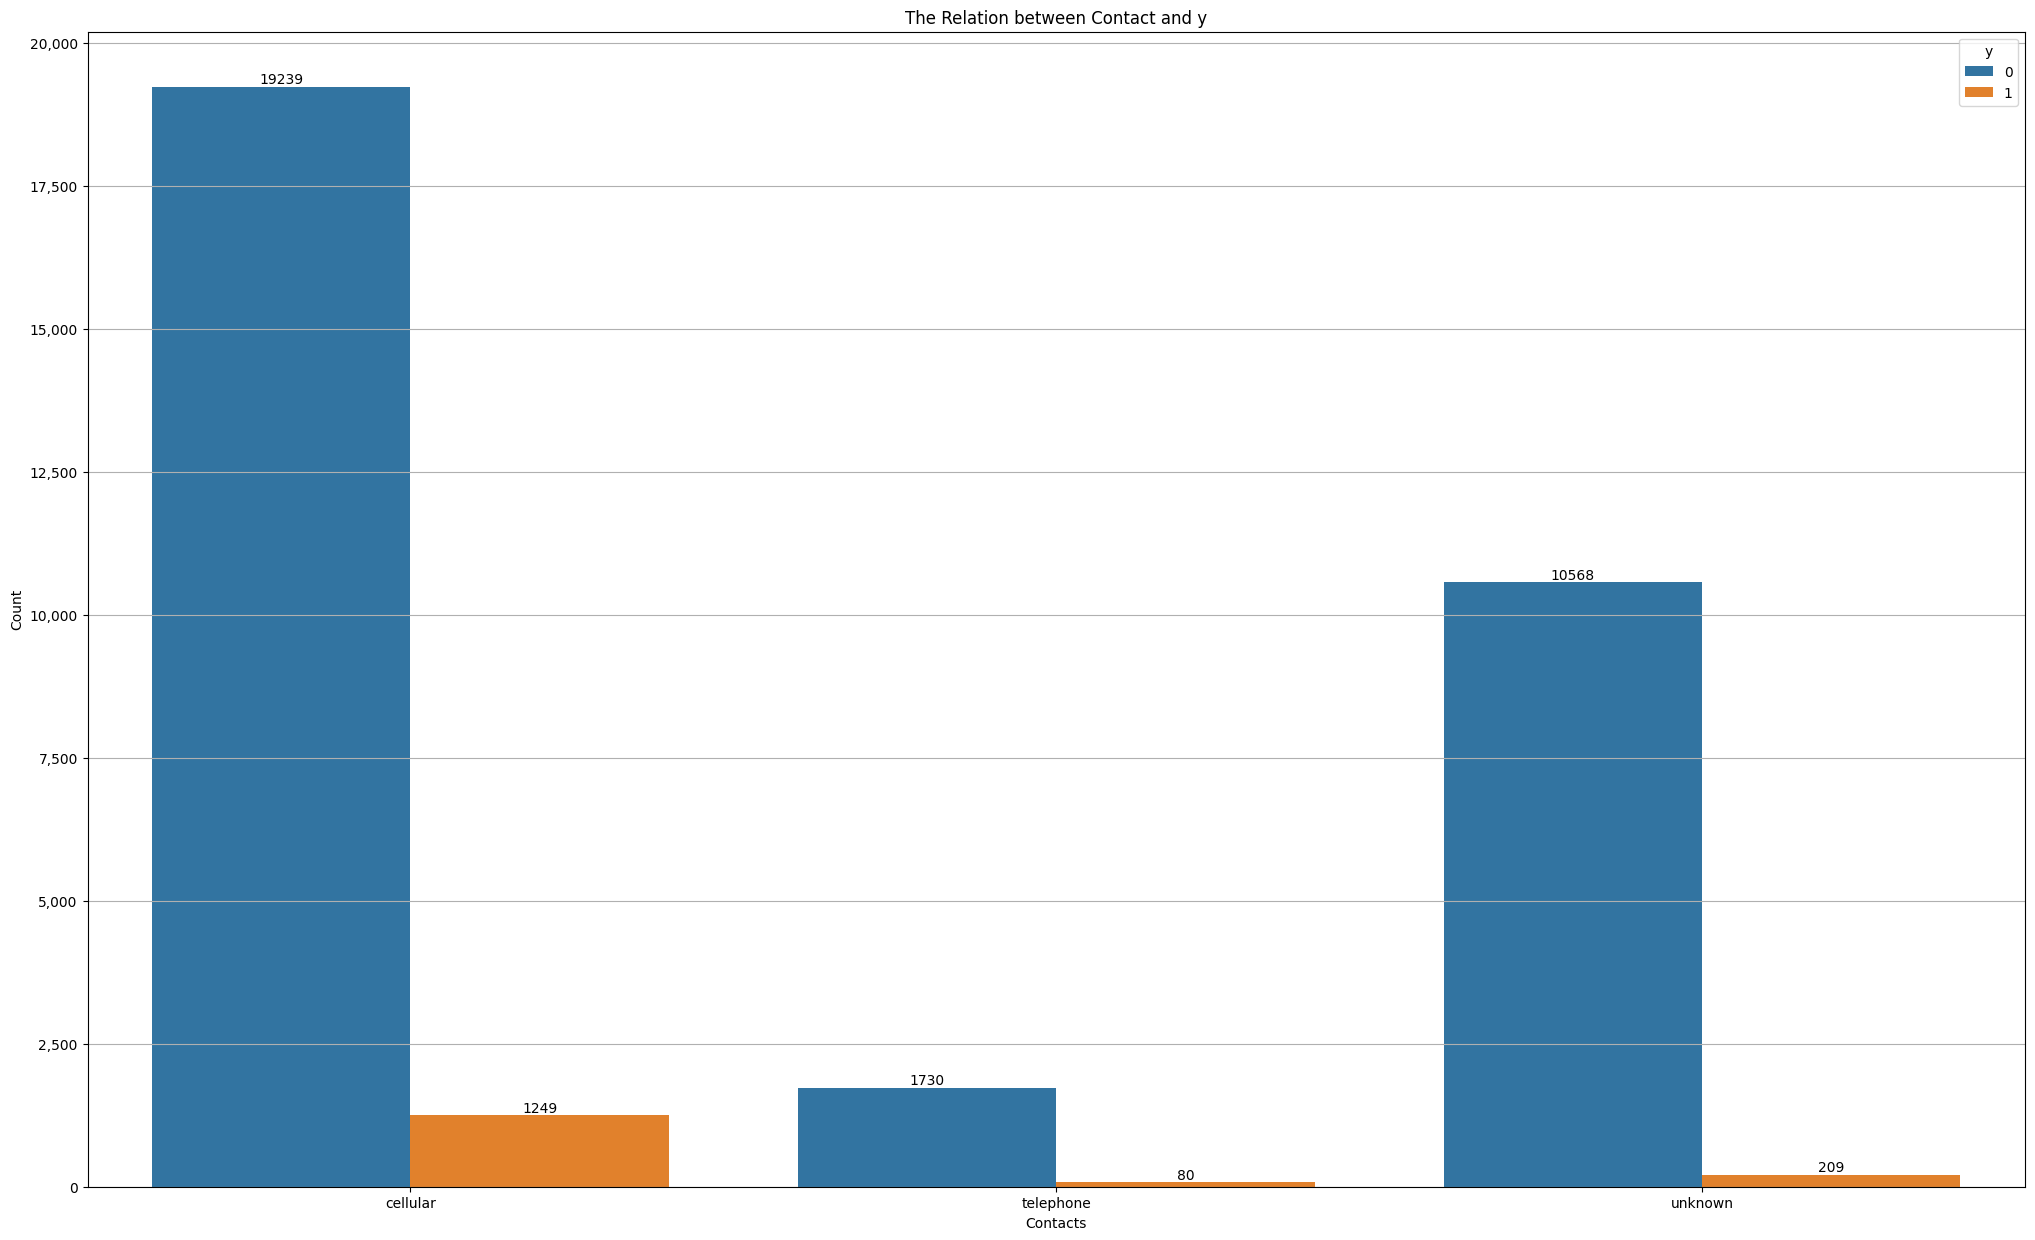

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))
formatter = plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')

group_contact_y = df.groupby('contact')['y'].value_counts().reset_index()

sns.barplot(x='contact', y='count', hue='y', data=group_contact_y)

ax.set_title("The Relation between Contact and y")
ax.set_xlabel("Contacts")
ax.set_ylabel("Count")
ax.grid(axis='y')
ax.yaxis.set_major_formatter(formatter)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

## **Feature Engineering**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33075 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         33075 non-null  int64 
 1   age        33075 non-null  int64 
 2   job        33075 non-null  object
 3   marital    33075 non-null  object
 4   education  33075 non-null  object
 5   default    33075 non-null  object
 6   balance    33075 non-null  int64 
 7   housing    33075 non-null  object
 8   loan       33075 non-null  object
 9   contact    33075 non-null  object
 10  day        33075 non-null  int64 
 11  month      33075 non-null  object
 12  duration   33075 non-null  int64 
 13  campaign   33075 non-null  int64 
 14  pdays      33075 non-null  int64 
 15  previous   33075 non-null  int64 
 16  y          33075 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 4.5+ MB


In [ ]:
# education_dict = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
# df['education'] = df['education'].map(education_dict)

# month_dict = {
#     'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
#     'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11,
# }
# df['month'] = df['month'].map(month_dict)

# df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['education'] = label_encoder.fit_transform(df['education'])
df['month'] = label_encoder.fit_transform(df['month'])

In [ ]:
df = pd.get_dummies(
    df, columns=['job', 'marital', 'contact', 'default', 'housing', 'loan'],
    dtype=int,
)
df.head()

,id,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,100,58,2,2143,5,8,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0
1,101,44,1,29,5,8,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0
2,102,33,1,2,5,8,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
3,103,47,3,1506,5,8,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0
4,104,33,3,1,5,8,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,id,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,100,58,2,2143,5,8,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0
1,101,44,1,29,5,8,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0
2,102,33,1,2,5,8,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
3,103,47,3,1506,5,8,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0
4,104,33,3,1,5,8,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0


In [ ]:
unknown_cols = ['job_unknown', 'contact_unknown']

df.drop(columns=unknown_cols, inplace=True)
df.head()

,id,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,100,58,2,2143,5,8,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
1,101,44,1,29,5,8,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
2,102,33,1,2,5,8,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
3,103,47,3,1506,5,8,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
4,104,33,3,1,5,8,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0


In [ ]:
df.drop(columns=['id'], inplace=True)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2,2143,5,8,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
1,44,1,29,5,8,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
2,33,1,2,5,8,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
3,47,3,1506,5,8,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
4,33,3,1,5,8,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = ['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0.764706,0.666667,0.788259,0.133333,0.8,0.338521,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
1,0.490196,0.333333,0.367562,0.133333,0.8,0.195850,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
2,0.274510,0.333333,0.362189,0.133333,0.8,0.098573,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
3,0.549020,1.000000,0.661493,0.133333,0.8,0.119326,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
4,0.274510,1.000000,0.361990,0.133333,0.8,0.256809,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0


In [ ]:
yes_count = (df['y'] == 1).sum()
no_count = (df['y'] == 0).sum()

total_count = len(df)

percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100

print("Before Sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)

Before Sampling
Percentage of 'yes' in 'y': 4.650037792894936
Percentage of 'no' in 'y': 95.34996220710507


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['y'])
y = df['y']

smote = SMOTE(random_state=24)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)
# X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
X_train

,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
59421,0.532278,0.333333,0.510227,0.724753,0.000000,0.498934,0.071151,0.536634,0.203844,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0
43582,0.259917,0.666667,0.615567,0.599890,0.875083,0.801785,0.000000,0.421805,0.142857,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0
33277,0.347261,0.666667,0.361791,0.711606,0.000000,0.341401,0.321263,0.431798,0.937923,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0
34193,0.241152,0.666667,0.577767,0.816234,0.581172,0.335547,0.209414,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0
28232,0.313725,0.333333,0.365174,0.100000,0.800000,0.142672,0.250000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62570,0.296303,0.666667,0.810371,0.059257,0.600000,0.244700,0.000000,0.011230,0.031756,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
38158,0.216030,0.428988,0.630466,0.076232,0.657393,0.501957,0.083333,0.247578,0.632296,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0
860,0.470588,0.333333,0.389652,0.200000,0.800000,0.164721,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
15795,0.490196,1.000000,0.623881,1.000000,0.500000,0.575875,0.416667,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

## **Modeling**

1. **Experiment 1**
  * One Hot Encoding
  * Test Size 0.3
  * LabelEncoder()
  * (+) 'id' Column
    * F1 Score (Decision Tree): 0.959
    * F1 Score (Random Forest): 0.978
    * F1 Score (K-Nearest Neighbors): 0.940
    * F1 Score (SVC): 0.831

2. **Experiment 2**
  * One Hot Encoding
  * Test Size 0.3
  * LabelEncoder()
  * (-) 'id' Column
    * F1 Score (Decision Tree): 0.954
    * F1 Score (Random Forest): 0.975
    * F1 Score (K-Nearest Neighbors): 0.896
    * F1 Score (SVC): 0.760
    * F1 Score (Neural Network): 0.669

3. **Experiment 3**
  * Min Max Scaling
  * One Hot Encoding
  * Test Size 0.3
  * LabelEncoder()
  * (+) 'id' Column
    * F1 Score (Decision Tree): 0.960
    * F1 Score (Random Forest): 0.979
    * F1 Score (K-Nearest Neighbors): 0.770
    * F1 Score (SVC): 0.644
    * F1 Score (Neural Network): 0.942

3. **Experiment 4**
  * Min Max Scaling
  * One Hot Encoding
  * Test Size 0.3
  * LabelEncoder()
  * (-) 'id' Column
    * F1 Score (Decision Tree): 0.946
    * F1 Score (Random Forest): 0.980
    * F1 Score (K-Nearest Neighbors): 0.937
    * F1 Score (SVC): 0.877
    * F1 Score (Neural Network): 0.671

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

f1_score_dt = f1_score(y_test, y_pred_dt)

print(f"F1 Score (Decision Tree): {f1_score_dt:.3f}")

F1 Score (Decision Tree): 0.946


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

f1_score_rf = f1_score(y_test, y_pred_rf)

print(f"F1 Score (Random Forest): {f1_score_rf:.3f}")

F1 Score (Random Forest): 0.980


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

f1_score_knn = f1_score(y_test, y_pred_knn)

print(f"F1 Score (K-Nearest Neighbors): {f1_score_knn:.3f}")

F1 Score (K-Nearest Neighbors): 0.937


In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

f1_score_svc = f1_score(y_test, y_pred_svc)

print(f"F1 Score (SVC): {f1_score_svc:.3f}")

F1 Score (SVC): 0.877


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.keras.metrics import F1Score

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[F1Score],
)

class myCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('f1_score') >= 0.95 and logs.get('val_f1_score') >= 0.95):
      print('\nTraining & validation accuracy are greater than or equal to 0.95 so cancelling training!')
      self.model.stop_training = True

callback = myCallback()

lr_scheduler = callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10 ** (epoch / 10),
    verbose=1,
)

reduce_lr_on_plateau = callbacks.ReduceLROnPlateau(
    monitor='val_f1_score', # Pantau akurasi validasi
    factor=0.5,             # Kurangi learning rate sebesar 10%
    patience=3,             # Tunggu 3 epoch sebelum mengurangi learning rate
    min_lr=1e-6,            # Batas minimal learning rate
    verbose=1,
)

model_checkpoint = callbacks.ModelCheckpoint(
    filepath='best_model.keras',  # Lokasi penyimpanan model
    monitor='val_f1_score',       # Pantau akurasi validasi
    save_best_only=True,          # Simpan hanya model dengan performa terbaik
    verbose=1,
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_f1_score',     # Pantau akurasi validasi
    patience=5,                 # Tunggu 5 epoch sebelum menghentikan training jika tidak ada peningkatan
    restore_best_weights=True,  # Kembalikan bobot model ke performa terbaik
)

history = model.fit(
    X_train, y_train, epochs=30,
    batch_size=64, validation_data=(X_test, y_test),
    callbacks=[callback],
)

loss, f1 = model.evaluate(X_test, y_test)
print(f'Validation F1-score: {f1:.3f}')

Epoch 1/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - f1_score: 0.6664 - loss: 0.4834 - val_f1_score: 0.6687 - val_loss: 0.3938
Epoch 2/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - f1_score: 0.6655 - loss: 0.3834 - val_f1_score: 0.6687 - val_loss: 0.3708
Epoch 3/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - f1_score: 0.6666 - loss: 0.3610 - val_f1_score: 0.6687 - val_loss: 0.3460
Epoch 4/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - f1_score: 0.6678 - loss: 0.3403 - val_f1_score: 0.6687 - val_loss: 0.3333
Epoch 5/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - f1_score: 0.6667 - loss: 0.3247 - val_f1_score: 0.6687 - val_loss: 0.3228
Epoch 6/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - f1_score: 0.6659 - loss: 0.3158 - val_f1_score: 0.6687 - val_loss: 0.3079
Epoch 7/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - f1_score: 0.6602 - loss: 0.2988 - val_f1_score: 0.6687 - val_loss: 0.3038
Epoch 8/30
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - f1_score: 0.6643 - loss: 0.2908 - val_f1_score: 0.

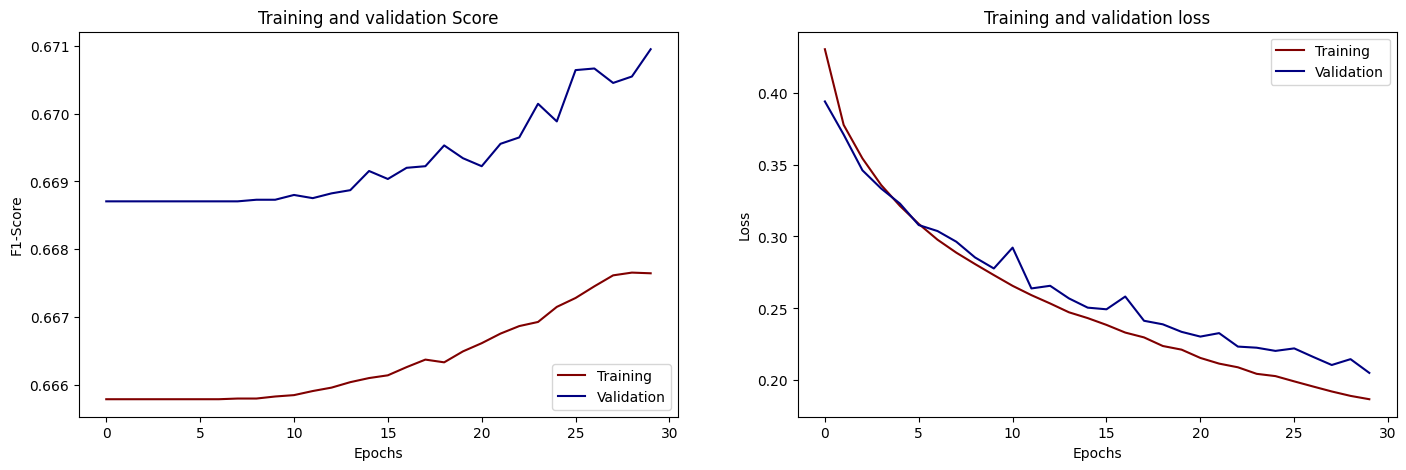

In [ ]:
acc = history.history['f1_score']
val_acc = history.history['val_f1_score']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_acc = range(len(acc))
epochs_loss = range(len(loss))

fig, (acc_fig, loss_fig) = plt.subplots(1, 2, figsize=(17, 5))

acc_fig.plot(epochs_acc, acc, '#800000', label='Training F1-Score')
acc_fig.plot(epochs_acc, val_acc, '#000080', label='Validation Score')
acc_fig.set_title('Training and validation Score')
acc_fig.set_xlabel('Epochs')
acc_fig.set_ylabel('F1-Score')
acc_fig.legend(["Training", "Validation"], loc ="lower right")

loss_fig.plot(epochs_loss, loss, '#800000', label='Training loss')
loss_fig.plot(epochs_loss, val_loss, '#000080', label='Validation loss')
loss_fig.set_title('Training and validation loss')
loss_fig.set_xlabel('Epochs')
loss_fig.set_ylabel('Loss')
loss_fig.legend(["Training", "Validation"], loc ="upper right")

plt.show()

## **Evaluation**

Based on the results of the F1-Score, the Random Forest model has the highest F1-Score of 98% using the 4th experiment.

# **Test**

In [ ]:
test_df = pd.read_csv('bank-test.csv', delimiter=';')
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40100,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,40101,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,40102,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,40103,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,40104,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5211 non-null   int64 
 1   age        5211 non-null   int64 
 2   job        5211 non-null   object
 3   marital    5211 non-null   object
 4   education  5211 non-null   object
 5   default    5211 non-null   object
 6   balance    5211 non-null   int64 
 7   housing    5211 non-null   object
 8   loan       5211 non-null   object
 9   contact    5211 non-null   object
 10  day        5211 non-null   int64 
 11  month      5211 non-null   object
 12  duration   5211 non-null   int64 
 13  campaign   5211 non-null   int64 
 14  pdays      5211 non-null   int64 
 15  previous   5211 non-null   int64 
 16  poutcome   5211 non-null   object
dtypes: int64(8), object(9)
memory usage: 692.2+ KB


In [ ]:
cat_cols = test_df.select_dtypes(include=['object'])

for col in cat_cols:
  print(test_df[col].value_counts())
  print()

job
management       1292
retired           827
technician        745
admin.            688
student           414
blue-collar       349
services          244
unemployed        199
self-employed     165
housemaid         153
entrepreneur       82
unknown            53
Name: count, dtype: int64

marital
married     2828
single      1901
divorced     482
Name: count, dtype: int64

education
secondary    2209
tertiary     2095
primary       581
unknown       326
Name: count, dtype: int64

default
no     5205
yes       6
Name: count, dtype: int64

housing
no     4112
yes    1099
Name: count, dtype: int64

loan
no     4897
yes     314
Name: count, dtype: int64

contact
cellular     4371
telephone     585
unknown       255
Name: count, dtype: int64

month
aug    1032
oct     658
jun     607
sep     579
jul     515
nov     372
feb     353
may     234
jan     227
mar     219
apr     214
dec     201
Name: count, dtype: int64

poutcome
unknown    2352
success    1178
failure    1171
other       5

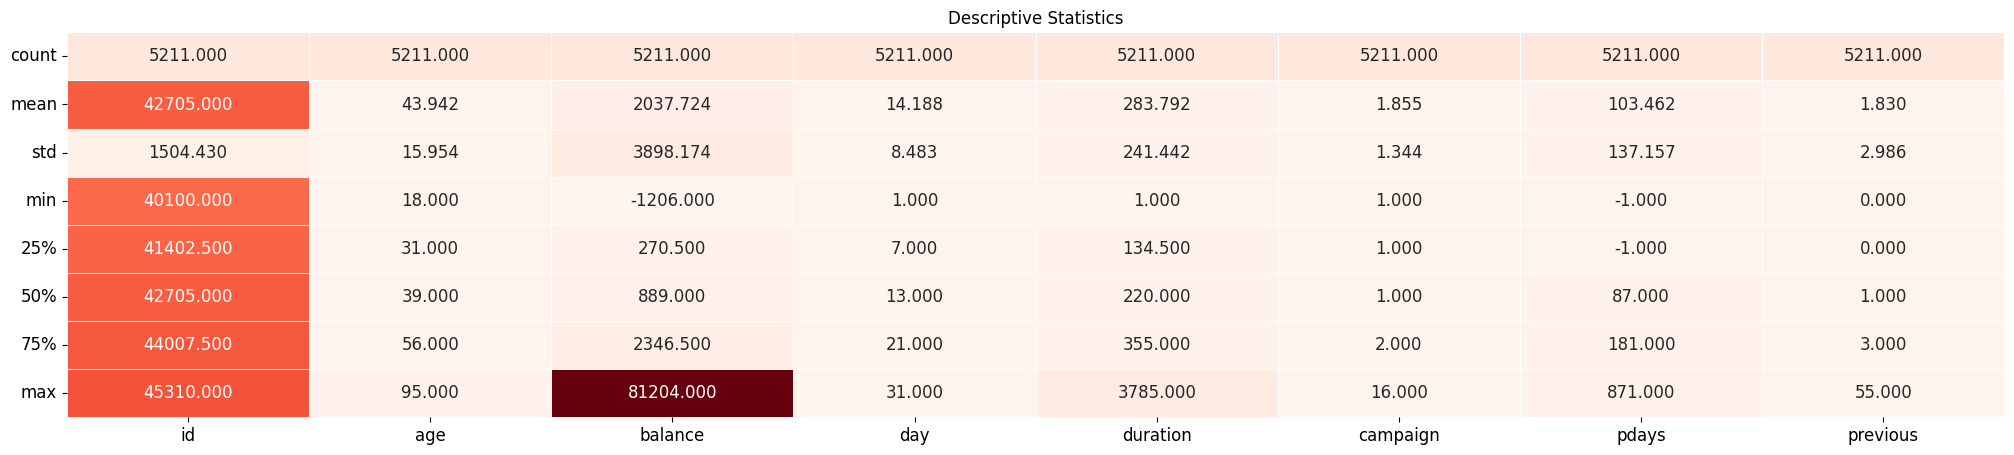

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = test_df.select_dtypes(include=['int64','float64'])

def desc_stats(num_cols):
  desc = test_df.describe()
  fig, ax = plt.subplots(figsize=(25, 5))
  sns.heatmap(
      desc, annot=True, cmap='Reds', fmt='.3f',
      ax=ax, linecolor='white', linewidths=0.5,
      cbar=False, annot_kws={"size": 12})
  plt.xticks(size=12)
  plt.yticks(size=12, rotation=0)
  plt.title("Descriptive Statistics", size=12)
  plt.show()

desc_stats(num_cols)

## **Data Preprocessing**

In [ ]:
print(test_df.isna().sum())

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [ ]:
print('Number of duplicates: ', test_df.duplicated().sum())

Number of duplicates:  0


In [ ]:
test_df.drop(columns=['poutcome'], inplace=True)
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,40100,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0
1,40101,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2
2,40102,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1
3,40103,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0
4,40104,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0


## **Feature Engineering**

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5211 non-null   int64 
 1   age        5211 non-null   int64 
 2   job        5211 non-null   object
 3   marital    5211 non-null   object
 4   education  5211 non-null   object
 5   default    5211 non-null   object
 6   balance    5211 non-null   int64 
 7   housing    5211 non-null   object
 8   loan       5211 non-null   object
 9   contact    5211 non-null   object
 10  day        5211 non-null   int64 
 11  month      5211 non-null   object
 12  duration   5211 non-null   int64 
 13  campaign   5211 non-null   int64 
 14  pdays      5211 non-null   int64 
 15  previous   5211 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 651.5+ KB


In [ ]:
# education_dict = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
# test_df['education'] = test_df['education'].map(education_dict)

# month_dict = {
#     'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
#     'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11,
# }
# test_df['month'] = test_df['month'].map(month_dict)

# test_df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

test_df['education'] = label_encoder.fit_transform(test_df['education'])
test_df['month'] = label_encoder.fit_transform(test_df['month'])

In [ ]:
test_df = pd.get_dummies(
    test_df, columns=['job', 'marital', 'contact', 'default', 'housing', 'loan'],
    dtype=int,
)
test_df.head()

,id,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,40100,57,1,718,3,6,170,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
1,40101,50,1,268,3,6,74,2,90,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
2,40102,46,1,4367,3,6,65,1,96,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0
3,40103,56,1,3554,3,6,151,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
4,40104,32,2,785,3,6,273,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
test_df.head()

,id,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,40100,57,1,718,3,6,170,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
1,40101,50,1,268,3,6,74,2,90,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
2,40102,46,1,4367,3,6,65,1,96,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0
3,40103,56,1,3554,3,6,151,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
4,40104,32,2,785,3,6,273,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0


In [ ]:
unknown_cols = ['job_unknown', 'contact_unknown']

test_df.drop(columns=unknown_cols, inplace=True)
test_df.head()

,id,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,40100,57,1,718,3,6,170,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40101,50,1,268,3,6,74,2,90,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,40102,46,1,4367,3,6,65,1,96,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0
3,40103,56,1,3554,3,6,151,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,40104,32,2,785,3,6,273,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0


In [ ]:
test_df.drop(columns=['id'], inplace=True)
test_df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,57,1,718,3,6,170,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
1,50,1,268,3,6,74,2,90,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,46,1,4367,3,6,65,1,96,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0
3,56,1,3554,3,6,151,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,32,2,785,3,6,273,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols = ['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

scaler = MinMaxScaler()
test_df[cols] = scaler.fit_transform(test_df[cols])
test_df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0.506494,0.333333,0.023347,0.066667,0.545455,0.044662,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
1,0.415584,0.333333,0.017886,0.066667,0.545455,0.019292,0.066667,0.104358,0.036364,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,0.363636,0.333333,0.067625,0.066667,0.545455,0.016913,0.000000,0.111239,0.018182,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0
3,0.493506,0.333333,0.057760,0.066667,0.545455,0.039641,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,0.181818,0.666667,0.024160,0.066667,0.545455,0.071882,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0


## **Prediction**

In [ ]:
y_test_pred = rf.predict(test_df)
test_df['y'] = y_test_pred
test_df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y
0,0.506494,0.333333,0.023347,0.066667,0.545455,0.044662,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0
1,0.415584,0.333333,0.017886,0.066667,0.545455,0.019292,0.066667,0.104358,0.036364,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
2,0.363636,0.333333,0.067625,0.066667,0.545455,0.016913,0.000000,0.111239,0.018182,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
3,0.493506,0.333333,0.057760,0.066667,0.545455,0.039641,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0
4,0.181818,0.666667,0.024160,0.066667,0.545455,0.071882,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0


In [ ]:
test_df.to_csv('submission.csv', index=False)